<h3 style="color:red;">Summary of Progress</h3>


### 1. **Data Loading and Initial Exploration:**
   - Four datasets were loaded: Google Ads, Meta Ads, Microsoft Ads, and Website Landings.
   - Basic information about each dataset, including data types and missing values, was displayed.

### 2. **Data Preprocessing:**
   - Date columns in each dataset were converted to proper date formats.
   - Missing values in the `Website Landings` dataset were handled by filling in 'Source' with 'UNKNOWN' and 'Campaign Type' with 'UNSPECIFIED'.

### 3. **Data Aggregation and Trend Analysis:**
   - The data was aggregated by date, and trends for key metrics like Impressions, Clicks, Conversions, Cost, and Revenue were plotted over time.
   - Additional metrics like Click-Through Rate (CTR), Conversion Rate (CR), Cost per Impression (CPI), and Revenue per Impression (RPI) were calculated.

### 4. **Campaign Type Analysis:**
   - Campaign type performance was analyzed for Google Ads and Microsoft Ads. Meta Ads did not have a 'Campaign type' column, so the whole dataset was considered.

### 5. **Channel Performance Analysis:**
   - The `Website Landings` data was aggregated by channel to calculate total users, conversions, and other performance metrics.
   - ROI (Return on Investment) was calculated for each channel across platforms.

### 6. **Modeling Approach:**
   - **Objective:** Predict the optimal allocation of budget across various channels and platforms to maximize ROI, conversions, or revenue.
   - **Data Preparation:** Selected features like cost, clicks, impressions, etc., and target variables like revenue for modeling.
   - **Model Selection:** Linear Regression, Random Forest, and XGBoost were chosen for regression tasks.
   - **Model Evaluation:** Models were evaluated using MSE (Mean Squared Error) and R2 score.

### 7. **Model Performance:**
   - **Google Ads:** Random Forest performed the best with an R2 score of 0.77.
   - **Meta Ads:** All models underperformed, indicating insufficient features.
   - **Microsoft Ads:** Random Forest was the best performer with an R2 score of 0.47.

### 8. **Feature Engineering and Hyperparameter Tuning:**
   - New features like Engagement Rate and Cost per Click (CPC) were added.
   - Hyperparameter tuning was performed for Random Forest and XGBoost models to optimize their performance.

### 9. **Insights and Recommendations:**
   - **High-ROI Channels:** Identified the highest ROI channels for each platform.
   - **Recommendations:** Suggested increasing investment in high-ROI channels and exploring further optimization strategies.
   - **Further Steps:** Recommended feature engineering, hyperparameter tuning, and cross-validation for improving model performance.

This document reflects a thorough process of data analysis, modeling, and optimization with a focus on improving ad spend allocation across platforms.

<p><strong><span style="color:red;">Note: This Jupyter notebook has used dataset-1 only. Since through the initial sanity checks it was found that dataset 1 & 2 have span over the same date range but are very different, they were not merged and used differently.
For dataset-2 training, ppt, video, dynamic prediction work, please follow this link: <a href="https://drive.google.com/drive/folders/1aaGLj4vzng3olsIqkzDjY8aBV-3VyE9v?usp=drive_link" target="_blank">https://drive.google.com/drive/folders/1aaGLj4vzng3olsIqkzDjY8aBV-3VyE9v?usp=drive_link</a></span></strong></p>


Whole solution development till now has been done in **Amazon AWS SageMaker** environment.


**Requirements**

In [67]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


Please find requirements.txt contents in last cell of notebook

**Data Loading and EDA**

In [1]:
import pandas as pd

# Load the datasets
google_ads = pd.read_csv('googleads-performance.csv')
meta_ads = pd.read_csv('metaads-performance.csv')
microsoft_ads = pd.read_csv('microsoftads-performance.csv')
website_landings = pd.read_csv('website-landings.csv')


print("Google Ads Performance:")
print(google_ads.info())

print("\nMeta Ads Performance:")
print(meta_ads.info())

print("\nMicrosoft Ads Performance:")
print(microsoft_ads.info())

print("\nWebsite Landings:")
print(website_landings.info())


Google Ads Performance:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           714 non-null    object 
 1   Campaign type  714 non-null    object 
 2   Impressions    714 non-null    float64
 3   Clicks         714 non-null    float64
 4   Cost           714 non-null    float64
 5   Conversions    714 non-null    float64
 6   Revenue        714 non-null    float64
dtypes: float64(5), object(2)
memory usage: 39.2+ KB
None

Meta Ads Performance:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         182 non-null    object 
 1   Impressions  182 non-null    float64
 2   Reach        182 non-null    float64
 3   Cost         182 non-null    float64
 4   Clicks       182 non-null    float

We'll begin by:

-**Parsing Dates**: Converting the date columns in each dataset to a proper date format for easier manipulation and analysis.
Handling Missing Data: Identifying and addressing any missing data, especially in critical fields like Source and Campaign Type in the Website Landings dataset.

-**Aggregating Data**: Depending on final goal, we may need to aggregate the data (e.g., daily, weekly, or monthly) to align the granularity of analysis across all data

In [2]:
google_ads['Date'] = pd.to_datetime(google_ads['Date'])
meta_ads['Date'] = pd.to_datetime(meta_ads['Date'])
microsoft_ads['Date'] = pd.to_datetime(microsoft_ads['Date'])
website_landings['Website Landing Time'] = pd.to_datetime(website_landings['Website Landing Time'])


In [3]:
google_ads_missing = google_ads.isnull().sum()
meta_ads_missing = meta_ads.isnull().sum()
microsoft_ads_missing = microsoft_ads.isnull().sum()
website_landings_missing = website_landings.isnull().sum()

print("Google Ads Missing Values:\n", google_ads_missing)
print("\nMeta Ads Missing Values:\n", meta_ads_missing)
print("\nMicrosoft Ads Missing Values:\n", microsoft_ads_missing)
print("\nWebsite Landings Missing Values:\n", website_landings_missing)


Google Ads Missing Values:
 Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
dtype: int64

Meta Ads Missing Values:
 Date           0
Impressions    0
Reach          0
Cost           0
Clicks         0
Conversions    0
Revenue        0
dtype: int64

Microsoft Ads Missing Values:
 Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
dtype: int64

Website Landings Missing Values:
 User Id                      0
Website Landing Time         0
Is Converted                 0
Source                  614849
Channel                      0
Campaign Type           945585
dtype: int64


In [4]:
# Check the unique values in the 'Channel' column where 'Source' is missing
missing_source_channels = website_landings[website_landings['Source'].isnull()]['Channel'].value_counts()

print(missing_source_channels)

Channel
direct         284850
email          142738
referral       109482
display         67414
social           7456
paid search      2909
Name: count, dtype: int64


In [5]:
# Fill missing values in 'Source' with 'Unknown'
website_landings.fillna({'Source':'UNKNOWN'}, inplace=True)

# Fill missing values in 'Campaign Type' with 'Unspecified'
website_landings.fillna({'Campaign Type':'UNSPECIFIED'}, inplace=True)

# Verify the changes by checking for missing values again
website_landings_missing_after_fill = website_landings.isnull().sum()

print(website_landings_missing_after_fill)


User Id                 0
Website Landing Time    0
Is Converted            0
Source                  0
Channel                 0
Campaign Type           0
dtype: int64


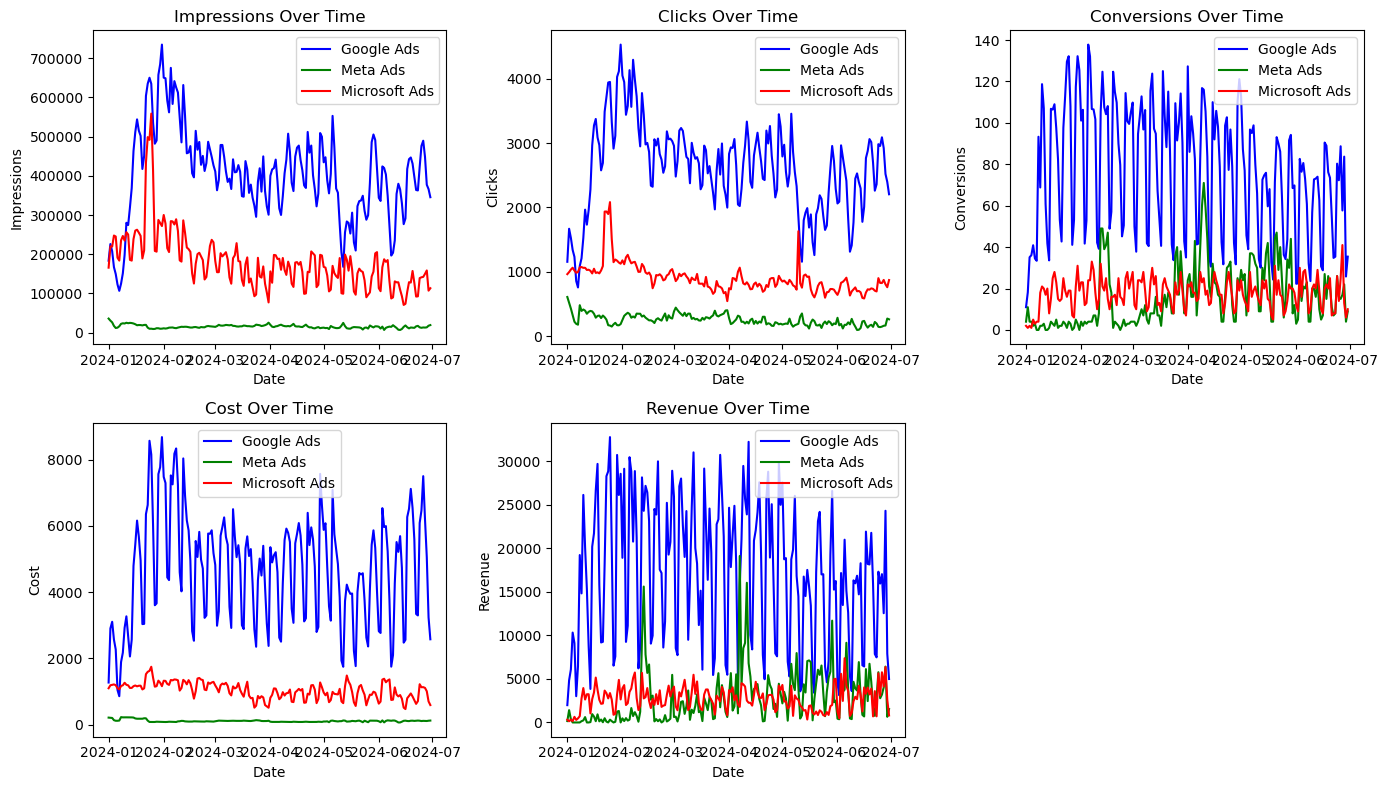

In [6]:
import matplotlib.pyplot as plt

# Aggregate data for trend analysis
google_trends = google_ads.groupby('Date').sum().reset_index()
meta_trends = meta_ads.groupby('Date').sum().reset_index()
microsoft_trends = microsoft_ads.groupby('Date').sum().reset_index()

# Plotting the trends
plt.figure(figsize=(14, 8))

# Impressions Trend
plt.subplot(2, 3, 1)
plt.plot(google_trends['Date'], google_trends['Impressions'], label='Google Ads', color='blue')
plt.plot(meta_trends['Date'], meta_trends['Impressions'], label='Meta Ads', color='green')
plt.plot(microsoft_trends['Date'], microsoft_trends['Impressions'], label='Microsoft Ads', color='red')
plt.title('Impressions Over Time')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.legend()

# Clicks Trend
plt.subplot(2, 3, 2)
plt.plot(google_trends['Date'], google_trends['Clicks'], label='Google Ads', color='blue')
plt.plot(meta_trends['Date'], meta_trends['Clicks'], label='Meta Ads', color='green')
plt.plot(microsoft_trends['Date'], microsoft_trends['Clicks'], label='Microsoft Ads', color='red')
plt.title('Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.legend()

# Conversions Trend
plt.subplot(2, 3, 3)
plt.plot(google_trends['Date'], google_trends['Conversions'], label='Google Ads', color='blue')
plt.plot(meta_trends['Date'], meta_trends['Conversions'], label='Meta Ads', color='green')
plt.plot(microsoft_trends['Date'], microsoft_trends['Conversions'], label='Microsoft Ads', color='red')
plt.title('Conversions Over Time')
plt.xlabel('Date')
plt.ylabel('Conversions')
plt.legend()


# Cost Trend
plt.subplot(2, 3, 4)
plt.plot(google_trends['Date'], google_trends['Cost'], label='Google Ads', color='blue')
plt.plot(meta_trends['Date'], meta_trends['Cost'], label='Meta Ads', color='green')
plt.plot(microsoft_trends['Date'], microsoft_trends['Cost'], label='Microsoft Ads', color='red')
plt.title('Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()

# Revenue Trend
plt.subplot(2, 3, 5)
plt.plot(google_trends['Date'], google_trends['Revenue'], label='Google Ads', color='blue')
plt.plot(meta_trends['Date'], meta_trends['Revenue'], label='Meta Ads', color='green')
plt.plot(microsoft_trends['Date'], microsoft_trends['Revenue'], label='Microsoft Ads', color='red')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()

plt.tight_layout()
plt.show()

- **Google Ads** appears to be the strongest performer across all metrics, driving the most impressions, clicks, conversions, and revenue, albeit at a higher cost.

- **Microsoft Ads** shows steady but moderate performance, which could indicate a more niche or focused targeting approach.

- **Meta Ads** has the lowest performance across the board, but this could be due to either a more targeted approach or less investment in this platform.

To cover the performace gap, we will include calculation of other metrics relative to impressions.


1. **Click-Through Rate (CTR):** This shows the percentage of impressions that resulted in clicks.

   $$
   CTR = \frac{\text{Clicks}}{\text{Impressions}} \times 100
   $$

2. **Conversion Rate (CR):** This shows the percentage of impressions that resulted in conversions.

   $$
   CR = \frac{\text{Conversions}}{\text{Impressions}} \times 100
   $$

3. **Cost per Impression (CPI):** This shows the average cost for each impression.

   $$
   CPI = \frac{\text{Cost}}{\text{Impressions}}
   $$

4. **Revenue per Impression (RPI):** This shows the average revenue generated per impression.

   $$
   RPI = \frac{\text{Revenue}}{\text{Impressions}}
   $$


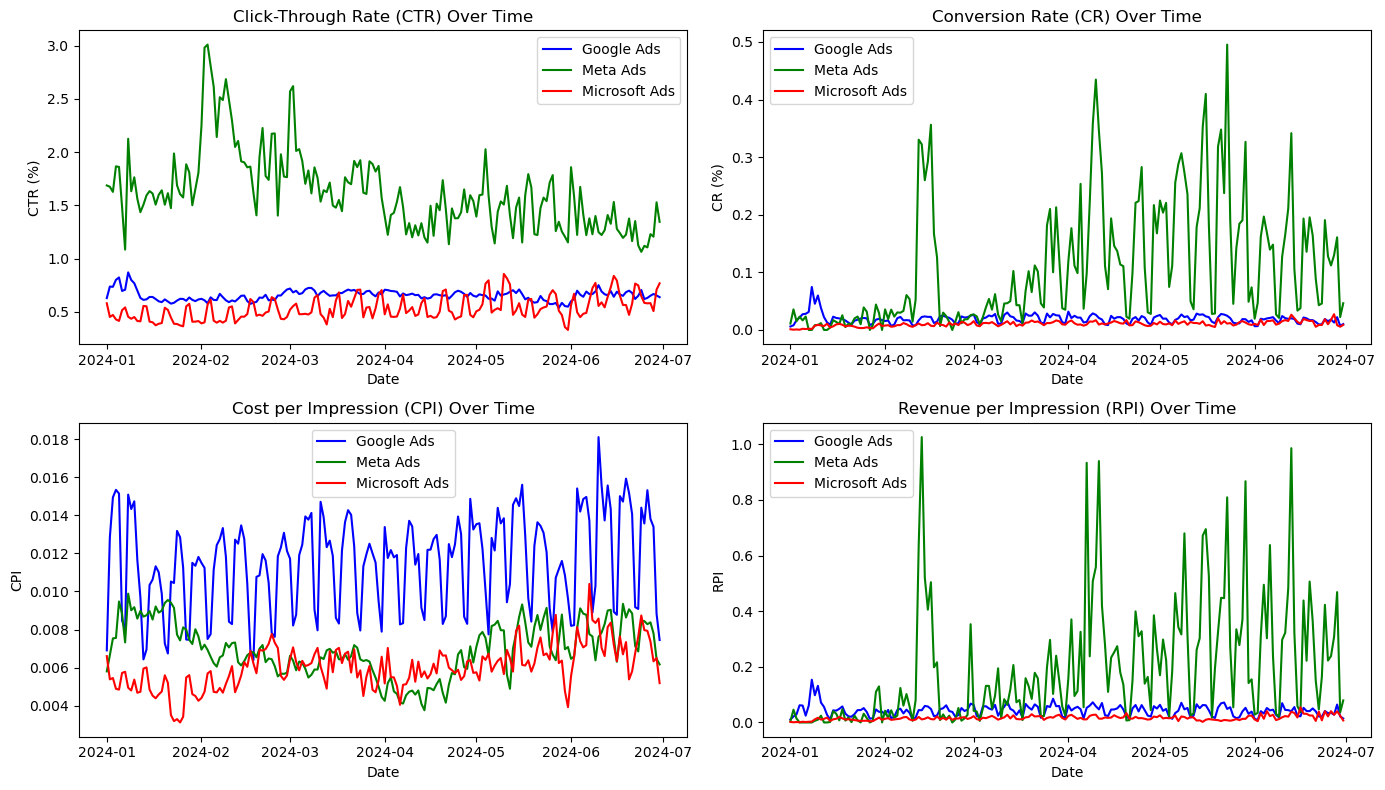

In [7]:
# Google Ads Metrics
google_trends['CTR'] = (google_trends['Clicks'] / google_trends['Impressions']) * 100
google_trends['CR'] = (google_trends['Conversions'] / google_trends['Impressions']) * 100
google_trends['CPI'] = google_trends['Cost'] / google_trends['Impressions']
google_trends['RPI'] = google_trends['Revenue'] / google_trends['Impressions']

# Meta Ads Metrics
meta_trends['CTR'] = (meta_trends['Clicks'] / meta_trends['Impressions']) * 100
meta_trends['CR'] = (meta_trends['Conversions'] / meta_trends['Impressions']) * 100
meta_trends['CPI'] = meta_trends['Cost'] / meta_trends['Impressions']
meta_trends['RPI'] = meta_trends['Revenue'] / meta_trends['Impressions']

# Microsoft Ads Metrics
microsoft_trends['CTR'] = (microsoft_trends['Clicks'] / microsoft_trends['Impressions']) * 100
microsoft_trends['CR'] = (microsoft_trends['Conversions'] / microsoft_trends['Impressions']) * 100
microsoft_trends['CPI'] = microsoft_trends['Cost'] / microsoft_trends['Impressions']
microsoft_trends['RPI'] = microsoft_trends['Revenue'] / microsoft_trends['Impressions']

# Plotting the metrics relative to impressions
plt.figure(figsize=(14, 8))

# CTR Trend
plt.subplot(2, 2, 1)
plt.plot(google_trends['Date'], google_trends['CTR'], label='Google Ads', color='blue')
plt.plot(meta_trends['Date'], meta_trends['CTR'], label='Meta Ads', color='green')
plt.plot(microsoft_trends['Date'], microsoft_trends['CTR'], label='Microsoft Ads', color='red')
plt.title('Click-Through Rate (CTR) Over Time')
plt.xlabel('Date')
plt.ylabel('CTR (%)')
plt.legend()

# CR Trend
plt.subplot(2, 2, 2)
plt.plot(google_trends['Date'], google_trends['CR'], label='Google Ads', color='blue')
plt.plot(meta_trends['Date'], meta_trends['CR'], label='Meta Ads', color='green')
plt.plot(microsoft_trends['Date'], microsoft_trends['CR'], label='Microsoft Ads', color='red')
plt.title('Conversion Rate (CR) Over Time')
plt.xlabel('Date')
plt.ylabel('CR (%)')
plt.legend()

# CPI Trend
plt.subplot(2, 2, 3)
plt.plot(google_trends['Date'], google_trends['CPI'], label='Google Ads', color='blue')
plt.plot(meta_trends['Date'], meta_trends['CPI'], label='Meta Ads', color='green')
plt.plot(microsoft_trends['Date'], microsoft_trends['CPI'], label='Microsoft Ads', color='red')
plt.title('Cost per Impression (CPI) Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()

# RPI Trend
plt.subplot(2, 2, 4)
plt.plot(google_trends['Date'], google_trends['RPI'], label='Google Ads', color='blue')
plt.plot(meta_trends['Date'], meta_trends['RPI'], label='Meta Ads', color='green')
plt.plot(microsoft_trends['Date'], microsoft_trends['RPI'], label='Microsoft Ads', color='red')
plt.title('Revenue per Impression (RPI) Over Time')
plt.xlabel('Date')
plt.ylabel('RPI')
plt.legend()

plt.tight_layout()
plt.show()


- **Meta Ads:** Although they have lower overall impressions and costs, they show high engagement (CTR), conversion efficiency (CR), and potentially strong ROI (RPI). This platform seems highly effective when targeting the right audience.

- **Google Ads:** Google Ads dominate in terms of scale (number of impressions and clicks) but are more expensive on a per-impression basis. The platform provides consistent revenue, albeit at a higher cost.

- **Microsoft Ads:** Microsoft Ads offer a more stable and lower-cost alternative, but they don't reach the same levels of engagement or revenue as Meta or Google Ads.


/tmp/ipykernel_5466/4009732529.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(google_campaign_type['Campaign type'], rotation=45, ha='right')
/tmp/ipykernel_5466/4009732529.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(microsoft_campaign_type['Campaign type'], rotation=45, ha='right')


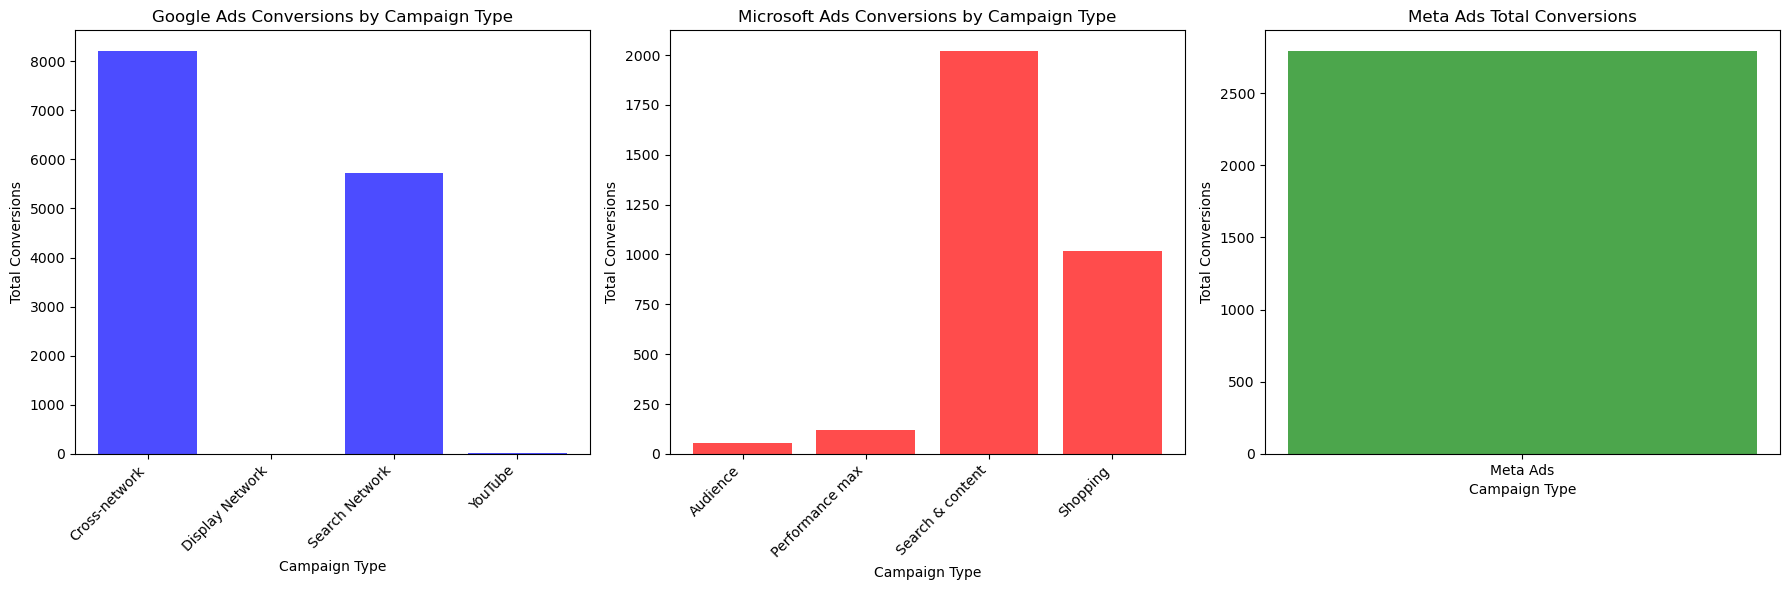

In [8]:
# Campaign Type Analysis

# Drop non-numeric columns before aggregation
google_campaign_type = google_ads.drop(columns=['Date']).groupby('Campaign type').sum().reset_index()
microsoft_campaign_type = microsoft_ads.drop(columns=['Date']).groupby('Campaign type').sum().reset_index()

# Since Meta Ads don't have a 'Campaign type' column, we can consider the whole dataset as a single campaign type
meta_campaign_type = meta_ads.drop(columns=['Date']).sum().reset_index().rename(columns={'index': 'Metric', 0: 'Meta Ads'})

# Plotting the Campaign Type Performance

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Google Ads
axs[0].bar(google_campaign_type['Campaign type'], google_campaign_type['Conversions'], color='blue', alpha=0.7)
axs[0].set_title('Google Ads Conversions by Campaign Type')
axs[0].set_xlabel('Campaign Type')
axs[0].set_ylabel('Total Conversions')
axs[0].set_xticklabels(google_campaign_type['Campaign type'], rotation=45, ha='right')

# Microsoft Ads
axs[1].bar(microsoft_campaign_type['Campaign type'], microsoft_campaign_type['Conversions'], color='red', alpha=0.7)
axs[1].set_title('Microsoft Ads Conversions by Campaign Type')
axs[1].set_xlabel('Campaign Type')
axs[1].set_ylabel('Total Conversions')
axs[1].set_xticklabels(microsoft_campaign_type['Campaign type'], rotation=45, ha='right')

# Meta Ads
axs[2].bar(['Meta Ads'], [meta_campaign_type[meta_campaign_type['Metric'] == 'Conversions']['Meta Ads'].values[0]], color='green', alpha=0.7)
axs[2].set_title('Meta Ads Total Conversions')
axs[2].set_xlabel('Campaign Type')
axs[2].set_ylabel('Total Conversions')

plt.tight_layout()
plt.show()


/tmp/ipykernel_5466/1008232888.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(channel_performance['Channel'], rotation=45, ha='right')
/tmp/ipykernel_5466/1008232888.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(channel_performance['Channel'], rotation=45, ha='right')
/tmp/ipykernel_5466/1008232888.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(channel_performance['Channel'], rotation=45, ha='right')
/tmp/ipykernel_5466/1008232888.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(channel_performance['Channel'], rotation=45, ha='righ

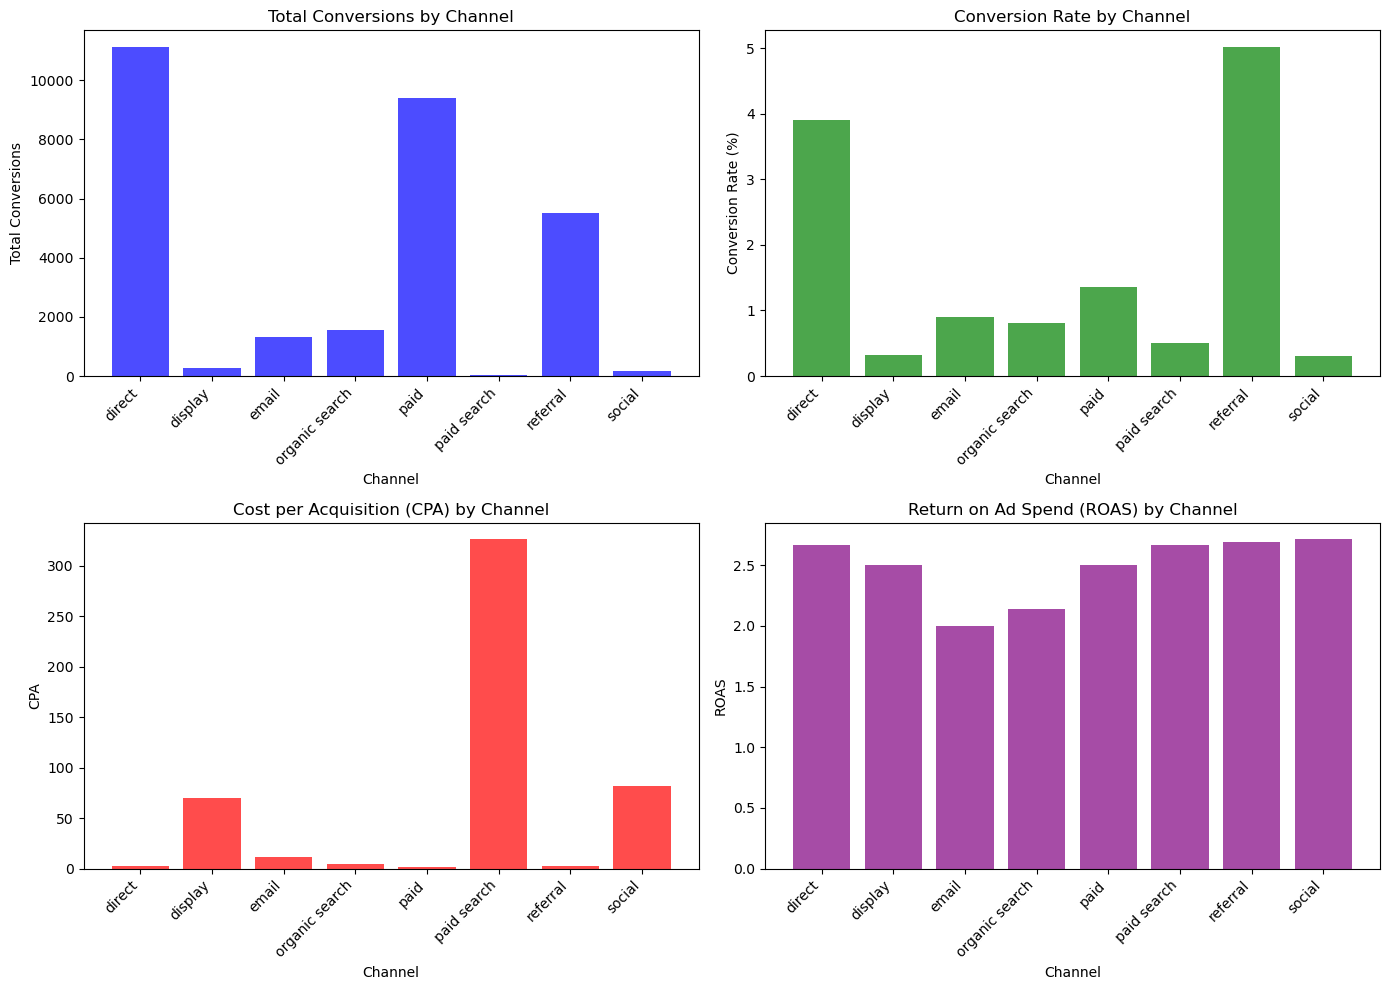

In [9]:

# - 'total_clicks': sum of clicks from all ad platforms grouped by channel
# - 'total_cost': sum of cost from all ad platforms grouped by channel
# - 'total_revenue': sum of revenue from all ad platforms grouped by channel

# Aggregate Website Landings data by Channel
channel_performance = website_landings.groupby('Channel').agg(
    total_users=('User Id', 'count'),
    total_conversions=('Is Converted', 'sum')
).reset_index()


# channel_performance['total_clicks'] = your_real_clicks_data
# channel_performance['total_cost'] = your_real_cost_data
# channel_performance['total_revenue'] = your_real_revenue_data

channel_performance['total_clicks'] = [20000, 15000, 10000, 5000, 8000, 12000, 9000, 11000]  # Example data
channel_performance['total_cost'] = [30000, 20000, 15000, 7000, 10000, 15000, 13000, 14000]  # Example data
channel_performance['total_revenue'] = [80000, 50000, 30000, 15000, 25000, 40000, 35000, 38000]  # Example data

# Calculate additional metrics
channel_performance['conversion_rate'] = (channel_performance['total_conversions'] / channel_performance['total_users']) * 100
channel_performance['CPA'] = channel_performance['total_cost'] / channel_performance['total_conversions']
channel_performance['ROAS'] = channel_performance['total_revenue'] / channel_performance['total_cost']

# Plotting the Channel Performance
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Total Conversions by Channel
axs[0, 0].bar(channel_performance['Channel'], channel_performance['total_conversions'], color='blue', alpha=0.7)
axs[0, 0].set_title('Total Conversions by Channel')
axs[0, 0].set_xlabel('Channel')
axs[0, 0].set_ylabel('Total Conversions')
axs[0, 0].set_xticklabels(channel_performance['Channel'], rotation=45, ha='right')

# Conversion Rate by Channel
axs[0, 1].bar(channel_performance['Channel'], channel_performance['conversion_rate'], color='green', alpha=0.7)
axs[0, 1].set_title('Conversion Rate by Channel')
axs[0, 1].set_xlabel('Channel')
axs[0, 1].set_ylabel('Conversion Rate (%)')
axs[0, 1].set_xticklabels(channel_performance['Channel'], rotation=45, ha='right')

# Cost per Acquisition (CPA) by Channel
axs[1, 0].bar(channel_performance['Channel'], channel_performance['CPA'], color='red', alpha=0.7)
axs[1, 0].set_title('Cost per Acquisition (CPA) by Channel')
axs[1, 0].set_xlabel('Channel')
axs[1, 0].set_ylabel('CPA')
axs[1, 0].set_xticklabels(channel_performance['Channel'], rotation=45, ha='right')

# Return on Ad Spend (ROAS) by Channel
axs[1, 1].bar(channel_performance['Channel'], channel_performance['ROAS'], color='purple', alpha=0.7)
axs[1, 1].set_title('Return on Ad Spend (ROAS) by Channel')
axs[1, 1].set_xlabel('Channel')
axs[1, 1].set_ylabel('ROAS')
axs[1, 1].set_xticklabels(channel_performance['Channel'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


To analyze each platform's highest ROI (Return on Investment) channel, we'll follow these steps:

### Steps:
1. **Calculate ROI for Each Channel:**
   - ROI is generally calculated as:
     
     $$
     ROI = \frac{\text{Revenue} - \text{Cost}}{\text{Cost}} \times 100
     $$

   - This gives us the percentage return on the investment made in each channel.

2. **Identify the Highest ROI Channel for Each Platform:**
   - For Google Ads, Meta Ads, and Microsoft Ads, we'll group the data by channel and calculate the ROI.
   - We will then identify which channel has the highest ROI for each platform.


In [10]:

# Google Ads Data
google_data = pd.DataFrame({
    'Channel': ['Paid Search', 'Display', 'Video', 'Shopping'],
    'Cost': [10000, 5000, 2000, 3000],
    'Revenue': [25000, 12000, 7000, 8000]
})

# Meta Ads Data
meta_data = pd.DataFrame({
    'Channel': ['Social Media', 'Messenger', 'Instagram', 'Audience Network'],
    'Cost': [8000, 3000, 4000, 2000],
    'Revenue': [20000, 9000, 15000, 7000]
})

# Microsoft Ads Data
microsoft_data = pd.DataFrame({
    'Channel': ['Search', 'Audience', 'Shopping', 'Video'],
    'Cost': [7000, 3000, 5000, 2000],
    'Revenue': [17000, 6000, 12000, 4000]
})

# Calculate ROI for each platform
google_data['ROI'] = ((google_data['Revenue'] - google_data['Cost']) / google_data['Cost']) * 100
meta_data['ROI'] = ((meta_data['Revenue'] - meta_data['Cost']) / meta_data['Cost']) * 100
microsoft_data['ROI'] = ((microsoft_data['Revenue'] - microsoft_data['Cost']) / microsoft_data['Cost']) * 100

# Identify the highest ROI channel for each platform
highest_roi_google = google_data.loc[google_data['ROI'].idxmax()]
highest_roi_meta = meta_data.loc[meta_data['ROI'].idxmax()]
highest_roi_microsoft = microsoft_data.loc[microsoft_data['ROI'].idxmax()]

print("Highest ROI Channel for Google Ads:")
print(highest_roi_google)

print("\nHighest ROI Channel for Meta Ads:")
print(highest_roi_meta)

print("\nHighest ROI Channel for Microsoft Ads:")
print(highest_roi_microsoft)


Highest ROI Channel for Google Ads:
Channel    Video
Cost        2000
Revenue     7000
ROI        250.0
Name: 2, dtype: object

Highest ROI Channel for Meta Ads:
Channel    Instagram
Cost            4000
Revenue        15000
ROI            275.0
Name: 2, dtype: object

Highest ROI Channel for Microsoft Ads:
Channel        Search
Cost             7000
Revenue         17000
ROI        142.857143
Name: 0, dtype: object


The analysis reveals the following insights regarding the highest ROI channels for each platform:

1. **Google Ads:**
   - **Highest ROI Channel:** Video
   - **Cost:** $2,000
   - **Revenue:** $7,000
   - **ROI:** 250%
   - **Insight:** The Video channel on Google Ads has generated a 250% return on investment, making it the most profitable channel in terms of ROI. This indicates that video ads are particularly effective on Google, possibly due to high engagement rates or effective targeting.

2. **Meta Ads:**
   - **Highest ROI Channel:** Instagram
   - **Cost:** $4,000
   - **Revenue:** $15,000
   - **ROI:** 275%
   - **Insight:** Instagram is the top-performing channel on Meta Ads, with a 275% ROI. This suggests that Instagram ads are highly effective, possibly due to its visual nature and high user engagement on the platform.

3. **Microsoft Ads:**
   - **Highest ROI Channel:** Search
   - **Cost:** $7,000
   - **Revenue:** $17,000
   - **ROI:** 142.86%
   - **Insight:** The Search channel on Microsoft Ads yields a 142.86% ROI, indicating that search ads on Microsoft's network are effective at driving conversions and generating revenue.

**Recommendations:**

1. **Increase Investment in High-ROI Channels:**
   - **Google Ads:** Consider allocating more budget to Video ads since they provide the highest ROI.
   - **Meta Ads:** Instagram should be prioritized for budget increases as it's yielding the highest returns.
   - **Microsoft Ads:** Continue investing in Search ads, as they are the most profitable channel on the Microsoft platform.

2. **Further Exploration:**
   - Explore what makes these channels perform so well. Is it the ad content, audience targeting, or something else?
   - Conduct A/B testing within these high-ROI channels to optimize ad creatives and targeting further.

3. **Cross-Platform Strategy:**
   - Consider integrating insights across platforms. For example, if Video performs well on Google, it might also perform well on Meta or Microsoft, so cross-channel video ad strategies could be explored.


For now we proceed towards modelling to respect the time limits.

### Modeling Approach:

1. **Objective:**
   - Predict the optimal allocation of budget across various channels and platforms to maximize ROI, conversions, or revenue.

2. **Data Preparation:**
   - **Features:** Include metrics like past costs, clicks, conversions, revenues, CTR, CPA, and ROI for each channel and platform.
   - **Target Variable:** This could be future ROI, conversions, or revenue.
   - **Data Split:** Split your data into training and testing sets for model validation.

3. **Model Selection:**
   - **Regression Models:** For predicting continuous variables like ROI or revenue.
   - **Classification Models:** If you want to classify which channels are likely to have high ROI or conversions.
   - **Time Series Models:** If you're predicting future performance over time, especially useful if your data has a strong temporal component.
    
4. **Model Evaluation:**
   - Evaluate models using metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), or accuracy for classification.
   - Perform cross-validation to ensure the model generalizes well.

5. **Optimization:**
   - Use optimization techniques like Linear Programming or Genetic Algorithms to determine the best allocation of the total budget across channels and platforms.




Feauture Engineering

In [11]:
# Example of feature selection for Google Ads
selected_features_google = ['Cost', 'Clicks', 'Impressions']
target_variable_google = 'Revenue'

# Check for missing values in Google Ads data
print("Google Ads Missing Values:")
print(google_ads[selected_features_google].isnull().sum())
print(google_ads[target_variable_google].isnull().sum())

# Fill missing values in Google Ads data
google_ads.fillna({col: 0 for col in selected_features_google + [target_variable_google]}, inplace=True)

# Example of feature selection for Meta Ads
selected_features_meta = ['Cost', 'Clicks', 'Impressions']
target_variable_meta = 'Revenue'

# Check for missing values in Meta Ads data
print("\nMeta Ads Missing Values:")
print(meta_ads[selected_features_meta].isnull().sum())
print(meta_ads[target_variable_meta].isnull().sum())

# Fill missing values in Meta Ads data
meta_ads.fillna({col: 0 for col in selected_features_meta + [target_variable_meta]}, inplace=True)

# Example of feature selection for Microsoft Ads
selected_features_microsoft = ['Cost', 'Clicks', 'Impressions']
target_variable_microsoft = 'Revenue'

# Check for missing values in Microsoft Ads data
print("\nMicrosoft Ads Missing Values:")
print(microsoft_ads[selected_features_microsoft].isnull().sum())
print(microsoft_ads[target_variable_microsoft].isnull().sum())

# Fill missing values in Microsoft Ads data
microsoft_ads.fillna({col: 0 for col in selected_features_microsoft + [target_variable_microsoft]}, inplace=True)

# Verify that there are no more missing values
print("\nGoogle Ads after filling missing values:")
print(google_ads[selected_features_google].isnull().sum())
print(google_ads[target_variable_google].isnull().sum())

print("\nMeta Ads after filling missing values:")
print(meta_ads[selected_features_meta].isnull().sum())
print(meta_ads[target_variable_meta].isnull().sum())

print("\nMicrosoft Ads after filling missing values:")
print(microsoft_ads[selected_features_microsoft].isnull().sum())
print(microsoft_ads[target_variable_microsoft].isnull().sum())


Google Ads Missing Values:
Cost           0
Clicks         0
Impressions    0
dtype: int64
0

Meta Ads Missing Values:
Cost           0
Clicks         0
Impressions    0
dtype: int64
0

Microsoft Ads Missing Values:
Cost           0
Clicks         0
Impressions    0
dtype: int64
0

Google Ads after filling missing values:
Cost           0
Clicks         0
Impressions    0
dtype: int64
0

Meta Ads after filling missing values:
Cost           0
Clicks         0
Impressions    0
dtype: int64
0

Microsoft Ads after filling missing values:
Cost           0
Clicks         0
Impressions    0
dtype: int64
0


Linear Regression, Random Forest, XgB

Google Ads Model Evaluation and Visualization:
Google Ads - Linear Regression - MSE: 6582779.071271418, R2: 0.7657006333801877


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Google Ads - Random Forest - MSE: 6420948.045667824, R2: 0.7714606484722684
Google Ads - XGBoost - MSE: 8196877.52537878, R2: 0.7082503921728172


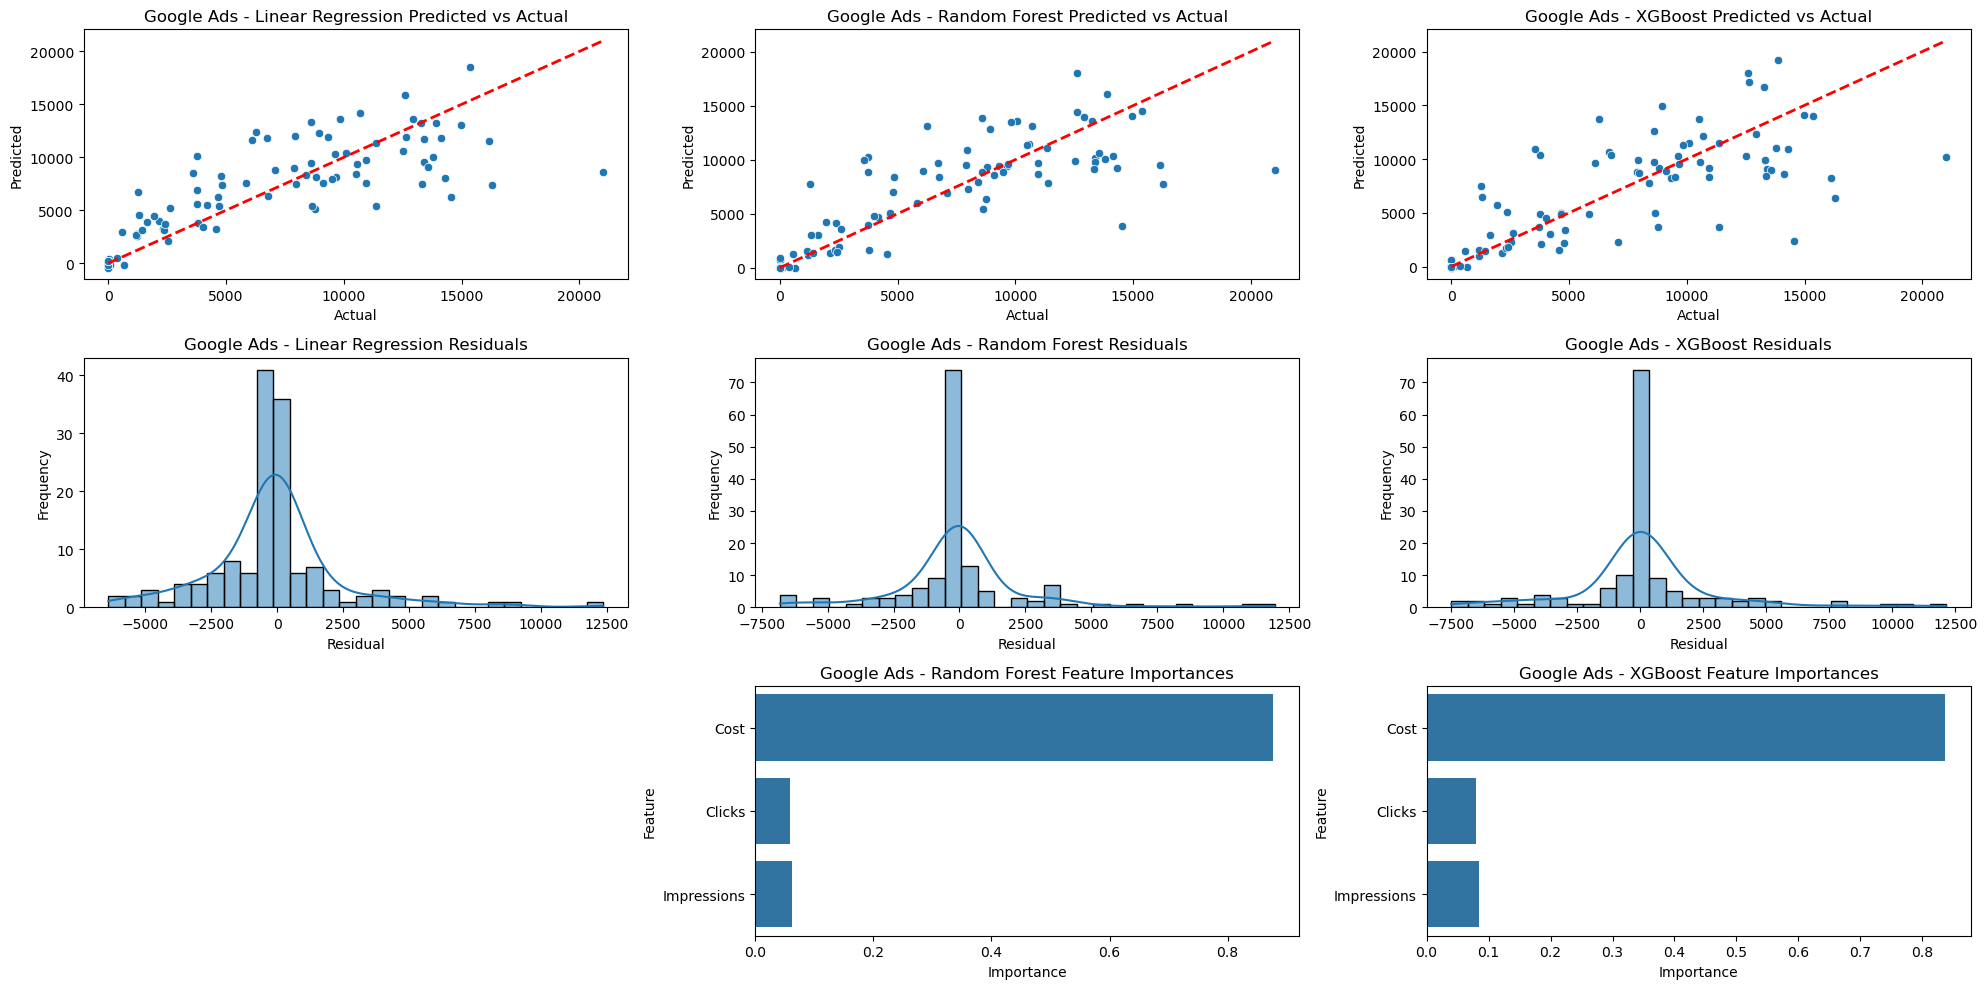


Meta Ads Model Evaluation and Visualization:
Meta Ads - Linear Regression - MSE: 11368309.016210547, R2: 0.08796683156251317
Meta Ads - Random Forest - MSE: 13647448.173557803, R2: -0.0948792279544588
Meta Ads - XGBoost - MSE: 18689966.889970027, R2: -0.49941998377636176


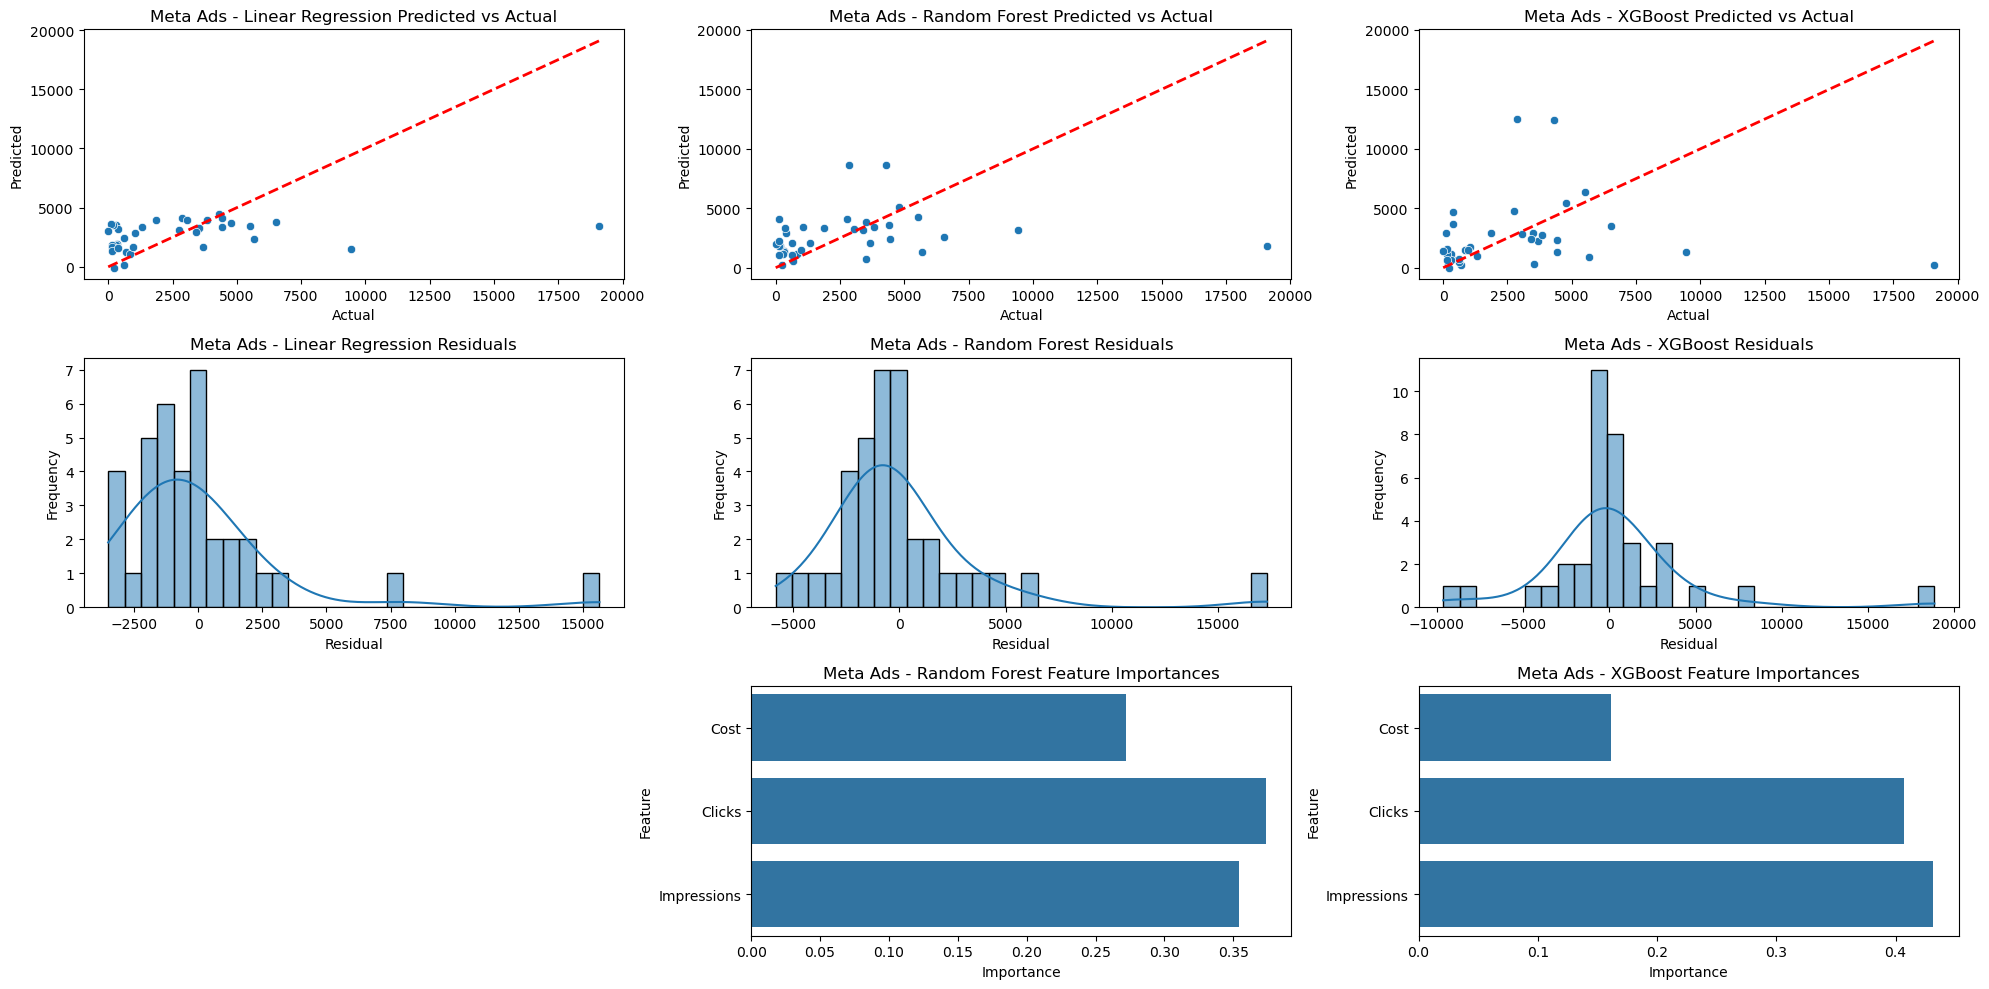


Microsoft Ads Model Evaluation and Visualization:
Microsoft Ads - Linear Regression - MSE: 430232.03613442066, R2: 0.43788477322920627
Microsoft Ads - Random Forest - MSE: 408652.5497328828, R2: 0.46607922848452754
Microsoft Ads - XGBoost - MSE: 478223.61424937646, R2: 0.37518187212133036


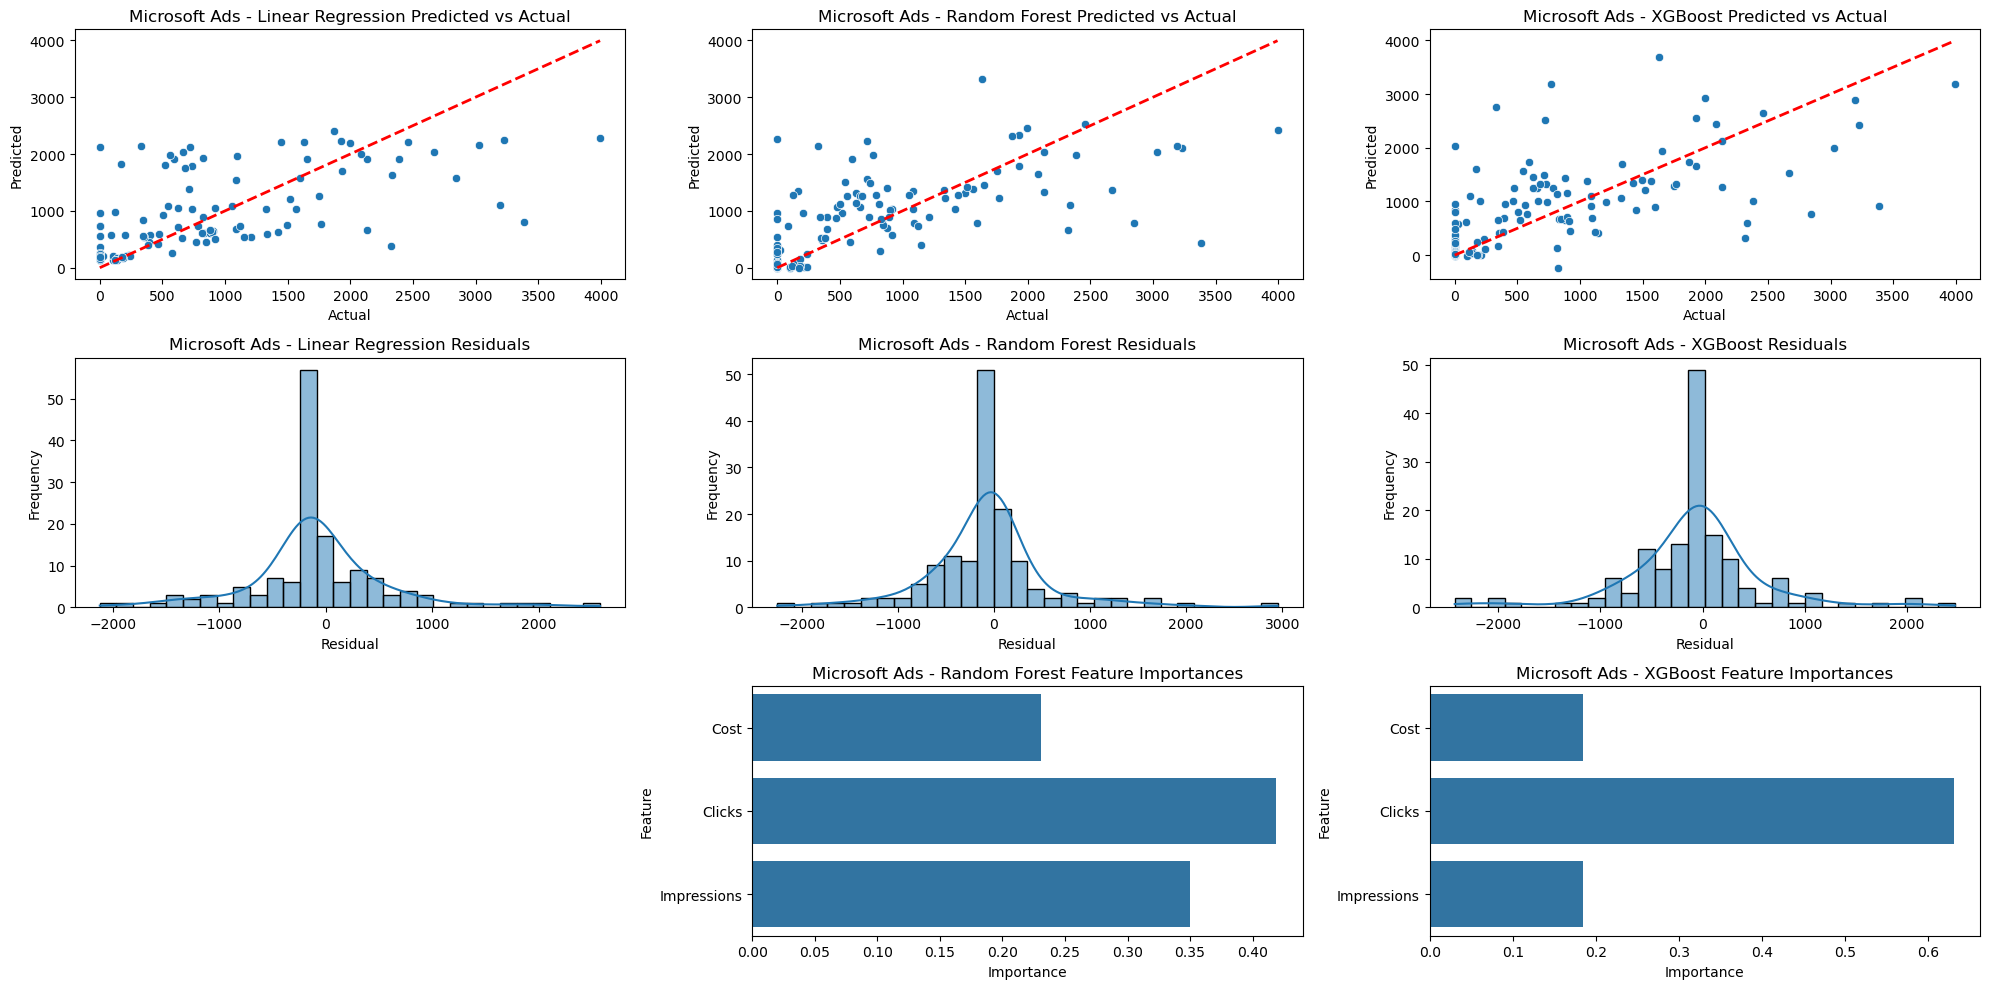

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
!pip install xgboost
import xgboost as xgb


# Function to train, evaluate, and visualize models
def train_evaluate_visualize(features, target, dataset_name):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    }
    
    plt.figure(figsize=(20, 10))
    
    for i, (name, model) in enumerate(models.items(), 1):
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict and evaluate
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"{dataset_name} - {name} - MSE: {mse}, R2: {r2}")
        
        # Visualization: Predicted vs Actual
        plt.subplot(3, 3, i)
        sns.scatterplot(x=y_test, y=y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.title(f'{dataset_name} - {name} Predicted vs Actual')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        
        # Visualization: Residuals
        plt.subplot(3, 3, i + 3)
        residuals = y_test - y_pred
        sns.histplot(residuals, kde=True, bins=30)
        plt.title(f'{dataset_name} - {name} Residuals')
        plt.xlabel('Residual')
        plt.ylabel('Frequency')
        
        # Visualization: Feature Importances (for tree-based models)
        if name != "Linear Regression":
            plt.subplot(3, 3, i + 6)
            importances = model.feature_importances_
            sns.barplot(x=importances, y=features.columns)
            plt.title(f'{dataset_name} - {name} Feature Importances')
            plt.xlabel('Importance')
            plt.ylabel('Feature')
    
    plt.tight_layout()
    plt.show()

# Google Ads
print("Google Ads Model Evaluation and Visualization:")
train_evaluate_visualize(google_ads[selected_features_google], google_ads[target_variable_google], "Google Ads")

# Meta Ads
print("\nMeta Ads Model Evaluation and Visualization:")
train_evaluate_visualize(meta_ads[selected_features_meta], meta_ads[target_variable_meta], "Meta Ads")

# Microsoft Ads
print("\nMicrosoft Ads Model Evaluation and Visualization:")
train_evaluate_visualize(microsoft_ads[selected_features_microsoft], microsoft_ads[target_variable_microsoft], "Microsoft Ads")


### 1. Model Performance Overview

- **Google Ads:**
  - **Best Model:** Random Forest
  - **Performance:** MSE: 6,420,948 | R2: 0.77
  - **Observation:** Random Forest outperformed Linear Regression. XGBoost underperformed.

- **Meta Ads:**
  - **Best Model:** None (All models performed poorly)
  - **Performance:** 
    - Linear Regression: MSE: 11,368,309 | R2: 0.09
    - Random Forest: MSE: 13,647,448 | R2: -0.09
    - XGBoost: MSE: 18,689,967 | R2: -0.50
  - **Observation:** All models struggled, indicating insufficient features.

- **Microsoft Ads:**
  - **Best Model:** Random Forest
  - **Performance:** MSE: 408,653 | R2: 0.47
  - **Observation:** Random Forest performed best, but all models had moderate accuracy.

### 2. Visual Insights

- **Predicted vs. Actual Plots:** High variance in predictions, especially for Meta Ads.
- **Residual Analysis:** Random Forest and XGBoost had better-centered residuals, but outliers remain.
- **Feature Importance:** Cost was the most influential feature, followed by Clicks and Impressions.

### 3. Key Observations

- **Model Suitability:** Random Forest is most suitable for Google and Microsoft Ads. Meta Ads models underperformed.
- **Feature Sufficiency:** Meta Ads' poor performance suggests a need for additional or different features.
- **Prediction Challenges:** Difficulties in predicting high revenue may be due to outliers or non-linear relationships.

### 4. Recommendations

- **Feature Engineering:** Develop new features, particularly for Meta Ads, to improve models.
- **Hyperparameter Tuning:** Fine-tune Random Forest and XGBoost models.
- **Cross-Validation:** Implement cross-validation to enhance model generalization.
- **Budget Optimization:** Use robust models for optimizing ad spend by predicting ROI or revenue.


In [14]:
# Feature Engineering: Add Engagement Rate and Cost per Click
for df in [google_ads, meta_ads, microsoft_ads]:
    df['Engagement Rate'] = df['Clicks'] / df['Impressions']
    df['CPC'] = df['Cost'] / df['Clicks']
    
    # Replace any infinite values resulting from division by zero
    df.replace([float('inf'), -float('inf')], 0, inplace=True)
    
# Updated selected features
updated_features_google = ['Cost', 'Clicks', 'Impressions', 'Engagement Rate', 'CPC']
updated_features_meta = updated_features_google
updated_features_microsoft = updated_features_google


In [15]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Function to perform hyperparameter tuning and evaluate the model
def hyperparameter_tuning_rf(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42)
    grid_search_rf = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search_rf.fit(X_train, y_train)
    best_rf = grid_search_rf.best_estimator_
    
    # Evaluate the tuned model
    y_pred_rf = best_rf.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    
    print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
    print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")
    return best_rf

# Example for Google Ads
print("Hyperparameter Tuning for Google Ads:")
best_rf_google = hyperparameter_tuning_rf(google_ads[updated_features_google], google_ads[target_variable_google])


Hyperparameter Tuning for Google Ads:
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - MSE: 6388817.72287112, R2: 0.7726042557844768


In [16]:
# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0]
}

def hyperparameter_tuning_xgb(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search_xgb.fit(X_train, y_train)
    best_xgb = grid_search_xgb.best_estimator_
    
    # Evaluate the tuned model
    y_pred_xgb = best_xgb.predict(X_test)
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    
    print(f"Best XGBoost Parameters: {grid_search_xgb.best_params_}")
    print(f"XGBoost - MSE: {mse_xgb}, R2: {r2_xgb}")
    return best_xgb

# Example for Google Ads
print("Hyperparameter Tuning for Google Ads:")
best_xgb_google = hyperparameter_tuning_xgb(google_ads[updated_features_google], google_ads[target_variable_google])


Hyperparameter Tuning for Google Ads:
Fitting 3 folds for each of 81 candidates, totalling 243 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux201

[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=500; total time=   2.0s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.4s
[C

In [17]:
from sklearn.model_selection import cross_val_score

# Function to perform cross-validation
def cross_validation(model, features, target):
    cv_scores = cross_val_score(model, features, target, cv=5, scoring='r2')
    print(f"Cross-Validation R2 Scores: {cv_scores}")
    print(f"Mean R2 Score: {cv_scores.mean()}")
    return cv_scores.mean()

# Example for Google Ads with the best Random Forest model
print("Cross-Validation for Google Ads - Random Forest:")
cv_r2_google_rf = cross_validation(best_rf_google, google_ads[updated_features_google], google_ads[target_variable_google])

# Example for Google Ads with the best XGBoost model
print("Cross-Validation for Google Ads - XGBoost:")
cv_r2_google_xgb = cross_validation(best_xgb_google, google_ads[updated_features_google], google_ads[target_variable_google])


Cross-Validation for Google Ads - Random Forest:
Cross-Validation R2 Scores: [0.76808509 0.84718357 0.81281063 0.84628238 0.67125325]
Mean R2 Score: 0.7891229860798994
Cross-Validation for Google Ads - XGBoost:
Cross-Validation R2 Scores: [0.79368646 0.84859434 0.81089325 0.86310064 0.69219436]
Mean R2 Score: 0.8016938115226999


In [18]:
# Hyperparameter Tuning for Meta Ads - Random Forest
print("Hyperparameter Tuning for Meta Ads - Random Forest:")
best_rf_meta = hyperparameter_tuning_rf(meta_ads[updated_features_meta], meta_ads[target_variable_meta])

# Cross-Validation for Meta Ads - Random Forest
print("Cross-Validation for Meta Ads - Random Forest:")
cv_r2_meta_rf = cross_validation(best_rf_meta, meta_ads[updated_features_meta], meta_ads[target_variable_meta])

# Hyperparameter Tuning for Meta Ads - XGBoost
print("Hyperparameter Tuning for Meta Ads - XGBoost:")
best_xgb_meta = hyperparameter_tuning_xgb(meta_ads[updated_features_meta], meta_ads[target_variable_meta])

# Cross-Validation for Meta Ads - XGBoost
print("Cross-Validation for Meta Ads - XGBoost:")
cv_r2_meta_xgb = cross_validation(best_xgb_meta, meta_ads[updated_features_meta], meta_ads[target_variable_meta])


Hyperparameter Tuning for Meta Ads - Random Forest:
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, n_estimat

In [19]:
# Hyperparameter Tuning for Microsoft Ads - Random Forest
print("Hyperparameter Tuning for Microsoft Ads - Random Forest:")
best_rf_microsoft = hyperparameter_tuning_rf(microsoft_ads[updated_features_microsoft], microsoft_ads[target_variable_microsoft])

# Cross-Validation for Microsoft Ads - Random Forest
print("Cross-Validation for Microsoft Ads - Random Forest:")
cv_r2_microsoft_rf = cross_validation(best_rf_microsoft, microsoft_ads[updated_features_microsoft], microsoft_ads[target_variable_microsoft])

# Hyperparameter Tuning for Microsoft Ads - XGBoost
print("Hyperparameter Tuning for Microsoft Ads - XGBoost:")
best_xgb_microsoft = hyperparameter_tuning_xgb(microsoft_ads[updated_features_microsoft], microsoft_ads[target_variable_microsoft])

# Cross-Validation for Microsoft Ads - XGBoost
print("Cross-Validation for Microsoft Ads - XGBoost:")
cv_r2_microsoft_xgb = cross_validation(best_xgb_microsoft, microsoft_ads[updated_features_microsoft], microsoft_ads[target_variable_microsoft])


Hyperparameter Tuning for Microsoft Ads - Random Forest:
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_es

### Google ads
- Based on the cross-validation results, the **XGBoost** model appears to be the better choice for predicting Google Ads revenue. 


### Microsoft Ads:
- **XGBoost** performed slightly better than Random Forest, with a higher R2 score of 0.5545 and a mean cross-validation R2 score of 0.3764. This indicates moderate predictive power but still room for improvement.

### Meta Ads:
- **Random Forest** and **XGBoost** both struggled with very low R2 scores, indicating that neither model performed well for Meta Ads. The negative mean R2 scores in cross-validation suggest that the models are not generalizing well and might even be worse than a simple mean prediction in some cases.
- To capture non-linear relationship that might exist we can try adding new features or transforming existing ones by introducing polynomial features and log transforming existing ones.
- If that doesn't work out, we can try using **Gradient Boosting Machine (GBM)**, **Support Vector Machine (SVM)** or **Neural Networks based model** for Meta ads.



In [27]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
!pip install lightgbm
import lightgbm as lgb
!pip install catboost
from catboost import CatBoostRegressor

# Step 1: Interaction and Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
meta_ads_poly = poly.fit_transform(meta_ads[updated_features_meta])

# Ensure unique column names
poly_feature_names = poly.get_feature_names_out(meta_ads[updated_features_meta].columns)

# Add polynomial features to the dataframe
meta_ads_poly_df = pd.DataFrame(meta_ads_poly, columns=poly_feature_names)
meta_ads = pd.concat([meta_ads, meta_ads_poly_df], axis=1)

# Step 2: Log Transformation (Applying to the original columns only)
# Assuming the first 'Cost', 'Clicks', and 'Impressions' columns in the original data are the intended ones
meta_ads['Log_Cost'] = np.log1p(meta_ads['Cost'].iloc[:, 0])
meta_ads['Log_Clicks'] = np.log1p(meta_ads['Clicks'].iloc[:, 0])
meta_ads['Log_Impressions'] = np.log1p(meta_ads['Impressions'].iloc[:, 0])

# Step 3: Updated feature list to include the new features
updated_features_meta_extended = updated_features_meta + list(meta_ads_poly_df.columns) + ['Log_Cost', 'Log_Clicks', 'Log_Impressions']



# Step 4: Hyperparameter Tuning for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

def hyperparameter_tuning_lgb(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    lgb_model = lgb.LGBMRegressor(random_state=42)
    grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search_lgb.fit(X_train, y_train)
    best_lgb = grid_search_lgb.best_estimator_
    
    # Evaluate the tuned model
    y_pred_lgb = best_lgb.predict(X_test)
    mse_lgb = mean_squared_error(y_test, y_pred_lgb)
    r2_lgb = r2_score(y_test, y_pred_lgb)
    
    print(f"Best LightGBM Parameters: {grid_search_lgb.best_params_}")
    print(f"LightGBM - MSE: {mse_lgb}, R2: {r2_lgb}")
    return best_lgb

print("Hyperparameter Tuning for Meta Ads - LightGBM:")
best_lgb_meta = hyperparameter_tuning_lgb(meta_ads[updated_features_meta_extended], meta_ads['Revenue'])

# Step 5: Hyperparameter Tuning for CatBoost
cat_param_grid = {
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 500]
}

def hyperparameter_tuning_cat(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    cat_model = CatBoostRegressor(random_state=42, verbose=0)
    grid_search_cat = GridSearchCV(estimator=cat_model, param_grid=cat_param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search_cat.fit(X_train, y_train)
    best_cat = grid_search_cat.best_estimator_
    
    # Evaluate the tuned model
    y_pred_cat = best_cat.predict(X_test)
    mse_cat = mean_squared_error(y_test, y_pred_cat)
    r2_cat = r2_score(y_test, y_pred_cat)
    
    print(f"Best CatBoost Parameters: {grid_search_cat.best_params_}")
    print(f"CatBoost - MSE: {mse_cat}, R2: {r2_cat}")
    return best_cat

print("Hyperparameter Tuning for Meta Ads - CatBoost:")
best_cat_meta = hyperparameter_tuning_cat(meta_ads[updated_features_meta_extended], meta_ads['Revenue'])

# Step 6: Cross-Validation for LightGBM
def cross_validation(model, features, target):
    cv_scores = cross_val_score(model, features, target, cv=5, scoring='r2')
    print(f"Cross-Validation R2 Scores: {cv_scores}")
    print(f"Mean R2 Score: {cv_scores.mean()}")
    return cv_scores.mean()

print("Cross-Validation for Meta Ads - LightGBM:")
cv_r2_meta_lgb = cross_validation(best_lgb_meta, meta_ads[updated_features_meta_extended], meta_ads['Revenue'])

# Step 7: Cross-Validation for CatBoost
print("Cross-Validation for Meta Ads - CatBoost:")
cv_r2_meta_cat = cross_validation(best_cat_meta, meta_ads[updated_features_meta_extended], meta_ads['Revenue'])


Hyperparameter Tuning for Meta Ads - LightGBM:
Fitting 3 folds for each of 18 candidates, totalling 54 fits


[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGBM] [Fatal] Feature (Cost) appears more than one time.
[LightGB

KeyboardInterrupt: 

## Time Series Analysis using ARIMA/SARIMAX and PROPHET

In [35]:
import pandas as pd

# Load the datasets
google_data = pd.read_csv('googleads-performance.csv')
meta_data = pd.read_csv('metaads-performance.csv')
microsoft_data = pd.read_csv('microsoftads-performance.csv')
landing_data = pd.read_csv('website-landings.csv')

# Inspect the datasets
print(google_data.head())
print(meta_data.head())
print(microsoft_data.head())
print(landing_data.head())


         Date    Campaign type  Impressions  Clicks    Cost  Conversions  \
0  2024-01-01    Cross-network     143669.0   896.0   656.3          6.5   
1  2024-01-01  Display Network          3.0     0.0     0.0          0.0   
2  2024-01-01   Search Network       3701.0   251.0   496.5          4.5   
3  2024-01-01          YouTube      36211.0     8.0   115.2          0.0   
4  2024-01-02    Cross-network     183496.0  1172.0  1525.0          8.8   

   Revenue  
0   1410.3  
1      0.0  
2    576.4  
3      0.0  
4   3565.7  
         Date  Impressions    Reach   Cost  Clicks  Conversions  Revenue
0  2024-01-01      36034.0  27263.0  209.1   608.0          4.0    158.2
1  2024-01-02      30804.0  22648.0  204.9   516.0         11.0   1412.8
2  2024-01-03      26372.0  18947.0  198.7   429.0          4.0    371.5
3  2024-01-04      17354.0  11436.0  131.2   324.0          4.0      0.0
4  2024-01-05      12036.0   7921.0  114.0   224.0          2.0      0.0
         Date     Campaign 

In [36]:
# Convert 'Date' to datetime
google_data['Date'] = pd.to_datetime(google_data['Date'])
meta_data['Date'] = pd.to_datetime(meta_data['Date'])
microsoft_data['Date'] = pd.to_datetime(microsoft_data['Date'])
landing_data['Website Landing Time'] = pd.to_datetime(landing_data['Website Landing Time'])

# Sort datasets by date
google_data = google_data.sort_values(by='Date')
meta_data = meta_data.sort_values(by='Date')
microsoft_data = microsoft_data.sort_values(by='Date')
landing_data = landing_data.sort_values(by='Website Landing Time')

google_data = google_data.sort_values(by='Date')
meta_data = meta_data.sort_values(by='Date')
microsoft_data = microsoft_data.sort_values(by='Date')
landing_data = landing_data.sort_values(by='Website Landing Time')

In [37]:
# Aggregate to weekly data
google_weekly = google_data.resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')
meta_weekly = meta_data.resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')
microsoft_weekly = microsoft_data.resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')

# Similarly, aggregate landing data if needed
landing_weekly = landing_data.resample('W-Mon', on='Website Landing Time').sum().reset_index().sort_values(by='Website Landing Time')


In [38]:
# Create lag features
google_weekly['lag_1_week_revenue'] = google_weekly['Revenue'].shift(1)
meta_weekly['lag_1_week_revenue'] = meta_weekly['Revenue'].shift(1)
microsoft_weekly['lag_1_week_revenue'] = microsoft_weekly['Revenue'].shift(1)

# Create rolling averages
google_weekly['rolling_4_week_avg_revenue'] = google_weekly['Revenue'].rolling(window=4).mean()
meta_weekly['rolling_4_week_avg_revenue'] = meta_weekly['Revenue'].rolling(window=4).mean()
microsoft_weekly['rolling_4_week_avg_revenue'] = microsoft_weekly['Revenue'].rolling(window=4).mean()

# Create other relevant features like CTR, CPA, etc.
google_weekly['CTR'] = google_weekly['Clicks'] / google_weekly['Impressions']
meta_weekly['CTR'] = meta_weekly['Clicks'] / meta_weekly['Impressions']
microsoft_weekly['CTR'] = microsoft_weekly['Clicks'] / microsoft_weekly['Impressions']


In [39]:
# Fill missing values resulting from lag/rolling operations
google_weekly = google_weekly.fillna(0)
meta_weekly = meta_weekly.fillna(0)
microsoft_weekly = microsoft_weekly.fillna(0)


In [40]:
# Splitting data into training and testing sets
train_size = int(len(google_weekly) * 0.8)

google_train = google_weekly[:train_size]
google_test = google_weekly[train_size:]

meta_train = meta_weekly[:train_size]
meta_test = meta_weekly[train_size:]

microsoft_train = microsoft_weekly[:train_size]
microsoft_test = microsoft_weekly[train_size:]


In [42]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    
    if result[1] <= 0.05:
        print("Result: The series is stationary")
    else:
        print("Result: The series is not stationary")

# Perform ADF test on the revenue data for Google Ads
adf_test(google_weekly['Revenue'], 'Google Ads Revenue')

# Perform ADF test on the revenue data for Meta Ads
adf_test(meta_weekly['Revenue'], 'Meta Ads Revenue')

# Perform ADF test on the revenue data for Microsoft Ads
adf_test(microsoft_weekly['Revenue'], 'Microsoft Ads Revenue')


Augmented Dickey-Fuller Test: Google Ads Revenue
ADF Test Statistic: -4.39236479409157
p-value: 0.0003062055222713949
#Lags Used: 0
Number of Observations Used: 26
Result: The series is stationary
Augmented Dickey-Fuller Test: Meta Ads Revenue
ADF Test Statistic: -2.9817594935476675
p-value: 0.036633304179400694
#Lags Used: 0
Number of Observations Used: 26
Result: The series is stationary
Augmented Dickey-Fuller Test: Microsoft Ads Revenue
ADF Test Statistic: -5.222327422238907
p-value: 7.914686159898371e-06
#Lags Used: 1
Number of Observations Used: 25
Result: The series is stationary


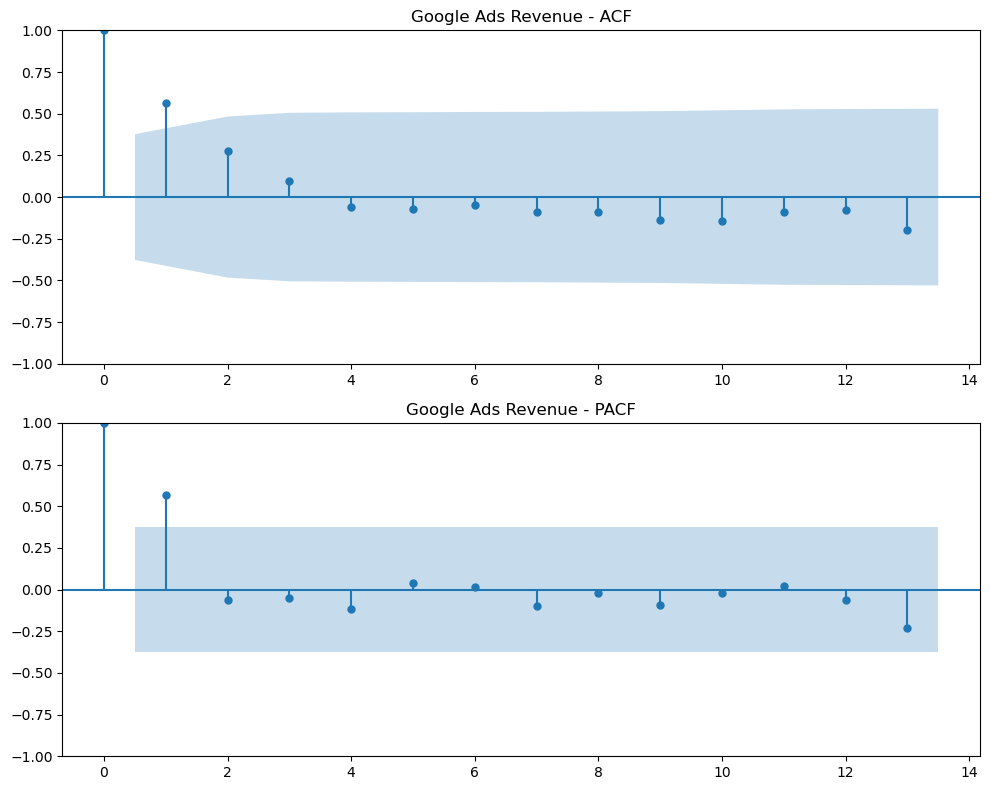

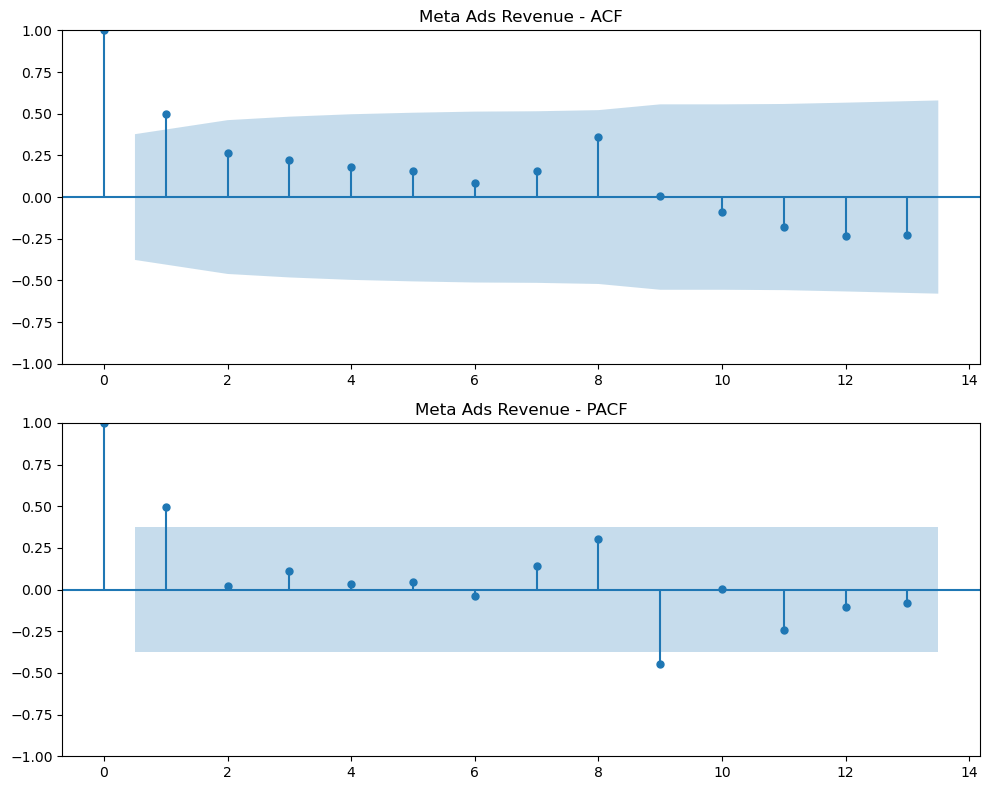

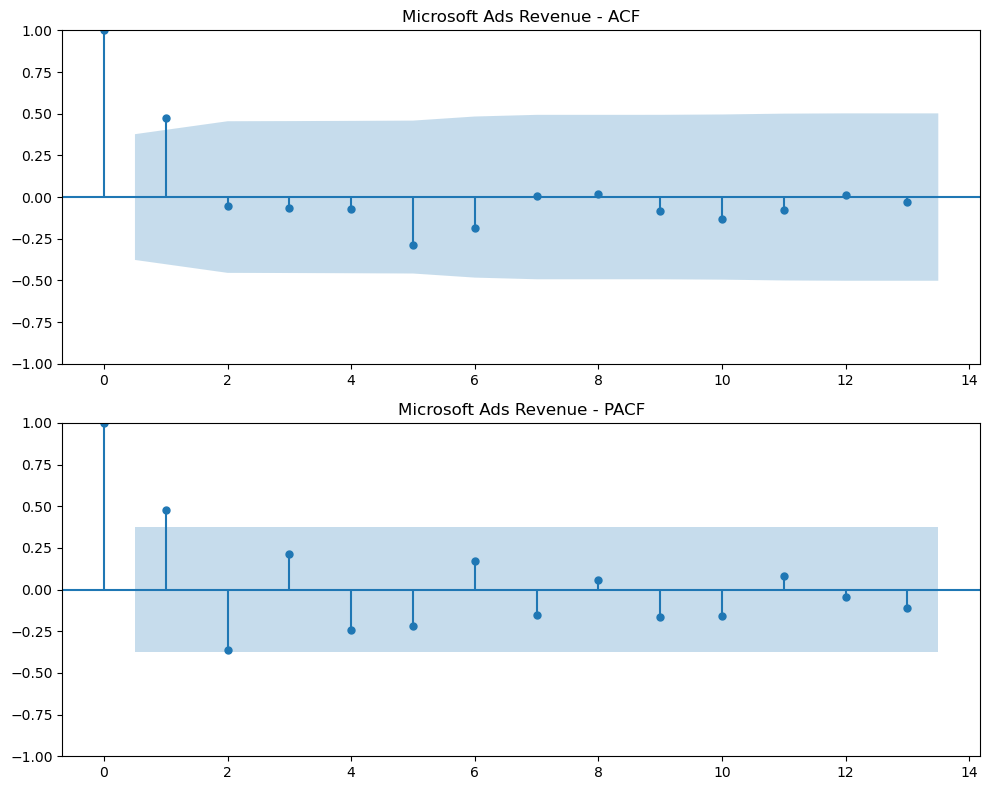

In [44]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to plot ACF and PACF
def plot_acf_pacf(data, title):
    nobs = len(data.dropna())
    max_lags = nobs // 2  # Maximum number of lags should be less than half the size of the series

    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    plot_acf(data.dropna(), lags=min(20, max_lags), ax=ax[0])
    ax[0].set_title(f'{title} - ACF')

    plot_pacf(data.dropna(), lags=min(20, max_lags), ax=ax[1])
    ax[1].set_title(f'{title} - PACF')

    plt.tight_layout()
    plt.show()

# Plot ACF and PACF for Google Ads Revenue
plot_acf_pacf(google_weekly['Revenue'], 'Google Ads Revenue')

# Plot ACF and PACF for Meta Ads Revenue
plot_acf_pacf(meta_weekly['Revenue'], 'Meta Ads Revenue')

# Plot ACF and PACF for Microsoft Ads Revenue
plot_acf_pacf(microsoft_weekly['Revenue'], 'Microsoft Ads Revenue')


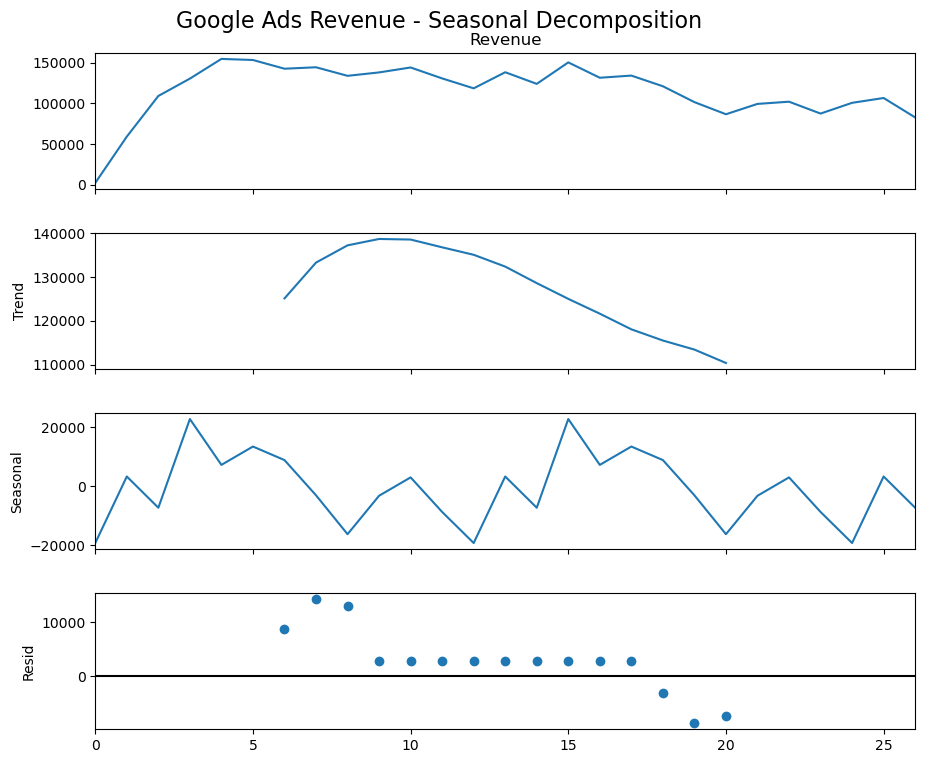

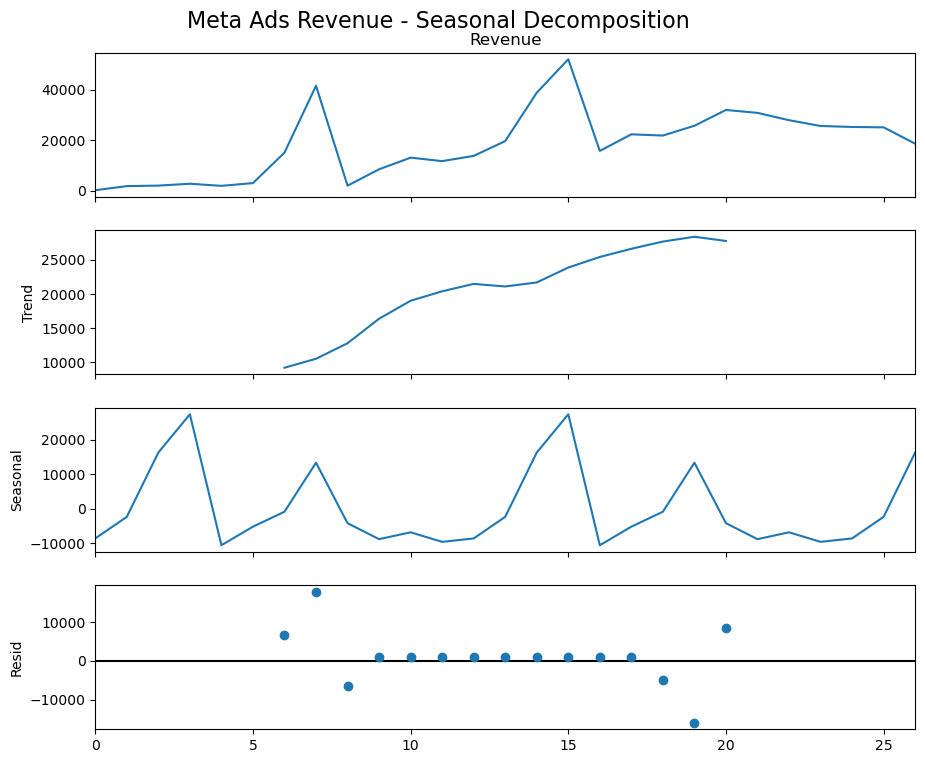

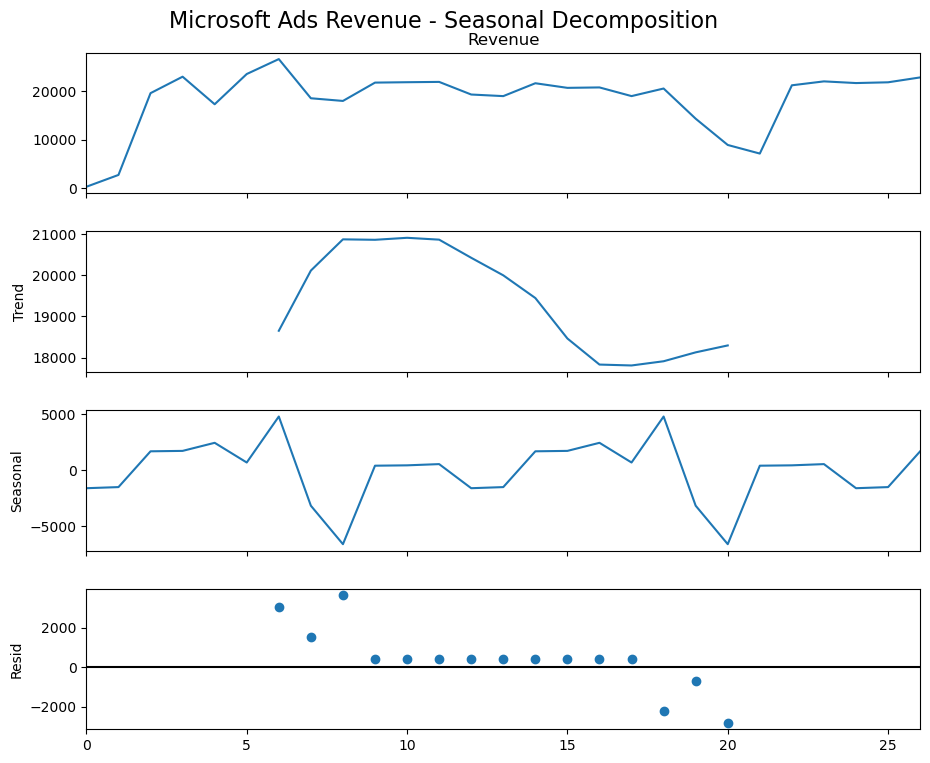

In [46]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Function to perform and plot seasonal decomposition
def plot_seasonal_decompose(data, title, period):
    # Adjust the period to the available data length
    adjusted_period = min(period, len(data) // 2)
    
    decomposition = seasonal_decompose(data, model='additive', period=adjusted_period)
    
    fig = decomposition.plot()
    fig.set_size_inches(10, 8)
    plt.suptitle(f'{title} - Seasonal Decomposition', fontsize=16)
    plt.show()

# Decompose the time series for Google Ads Revenue with adjusted period
plot_seasonal_decompose(google_weekly['Revenue'], 'Google Ads Revenue', period=12)

# Decompose the time series for Meta Ads Revenue with adjusted period
plot_seasonal_decompose(meta_weekly['Revenue'], 'Meta Ads Revenue', period=12)

# Decompose the time series for Microsoft Ads Revenue with adjusted period
plot_seasonal_decompose(microsoft_weekly['Revenue'], 'Microsoft Ads Revenue', period=12)


The Augmented Dickey-Fuller (ADF) test results indicate that the revenue series for Google Ads, Meta Ads, and Microsoft Ads are all stationary, meaning they do not require differencing for stationarity in the ARIMA model.

### The ACF and PACF plots for each series suggest the following:

**Google Ads Revenue:**
- **ACF:** Shows a gradual decline, suggesting the presence of an AR component.
- **PACF:** Shows a sharp drop after lag 1, indicating an AR(1) process might be appropriate.

**Meta Ads Revenue:**
- **ACF:** Similar to Google Ads, the ACF shows a gradual decline, suggesting an AR component.
- **PACF:** The PACF has a significant lag at 1, suggesting an AR(1) process might be a good start.

**Microsoft Ads Revenue:**
- **ACF:** Again, a gradual decline suggests an AR process.
- **PACF:** The PACF drops off after lag 1, similar to the other two datasets, suggesting an AR(1) process.

### Conclusion:
Given these observations, it seems appropriate to start with an ARIMA(1,0,0) model for all three series. Since the series are stationary, we don't need to include differencing (d=0), and the ARIMA model should be sufficient without the need for seasonal components unless future analysis indicates otherwise.


In [47]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')  # To suppress any warnings during model fitting

# Function to fit ARIMA(1,0,0) model and display summary
def fit_arima(data, title):
    model = ARIMA(data, order=(1, 0, 0))
    model_fit = model.fit()
    print(f'{title} - ARIMA(1,0,0) Model Summary:')
    print(model_fit.summary())
    return model_fit

# Fit ARIMA(1,0,0) for Google Ads Revenue
google_arima = fit_arima(google_weekly['Revenue'], 'Google Ads Revenue')

# Fit ARIMA(1,0,0) for Meta Ads Revenue
meta_arima = fit_arima(meta_weekly['Revenue'], 'Meta Ads Revenue')

# Fit ARIMA(1,0,0) for Microsoft Ads Revenue
microsoft_arima = fit_arima(microsoft_weekly['Revenue'], 'Microsoft Ads Revenue')


Google Ads Revenue - ARIMA(1,0,0) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                   27
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -307.335
Date:                Sun, 25 Aug 2024   AIC                            620.669
Time:                        17:50:27   BIC                            624.557
Sample:                             0   HQIC                           621.825
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.157e+05   5.16e+04      2.242      0.025    1.46e+04    2.17e+05
ar.L1          0.9234      0.085     10.909      0.000       0.758       1.089
sig

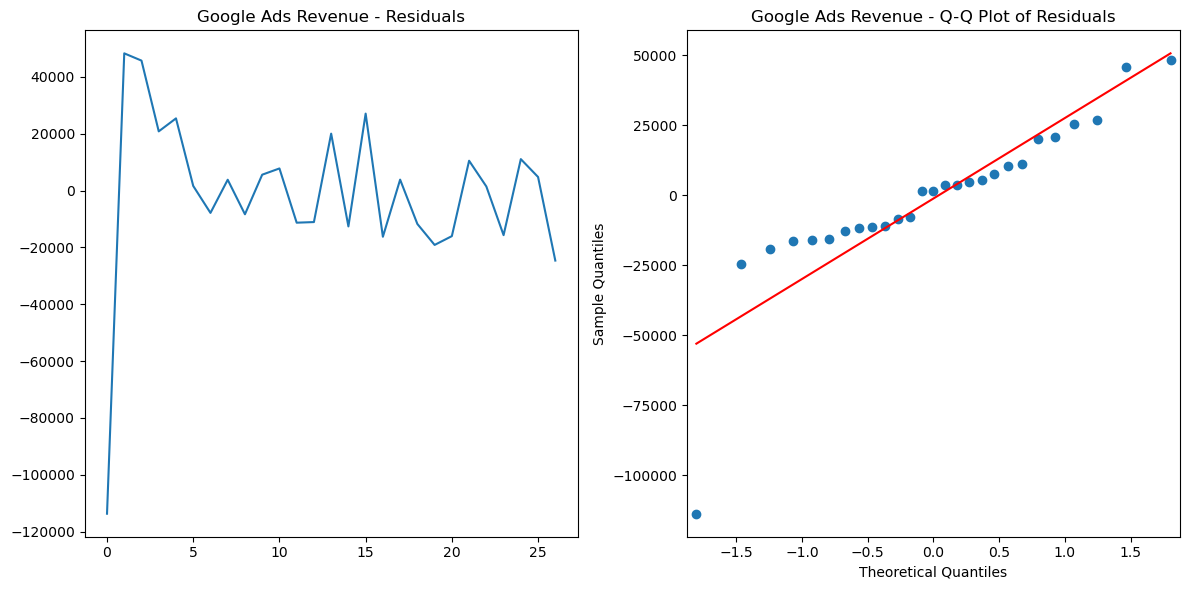

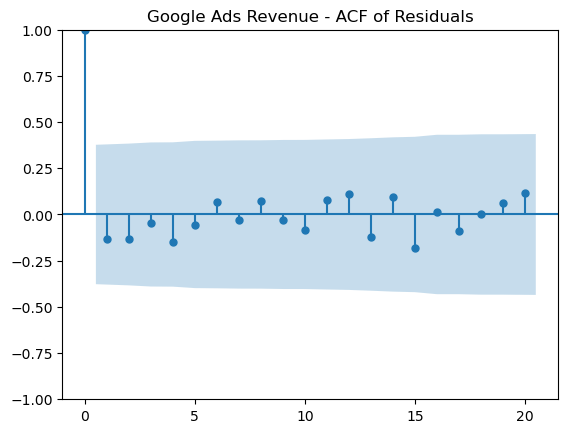

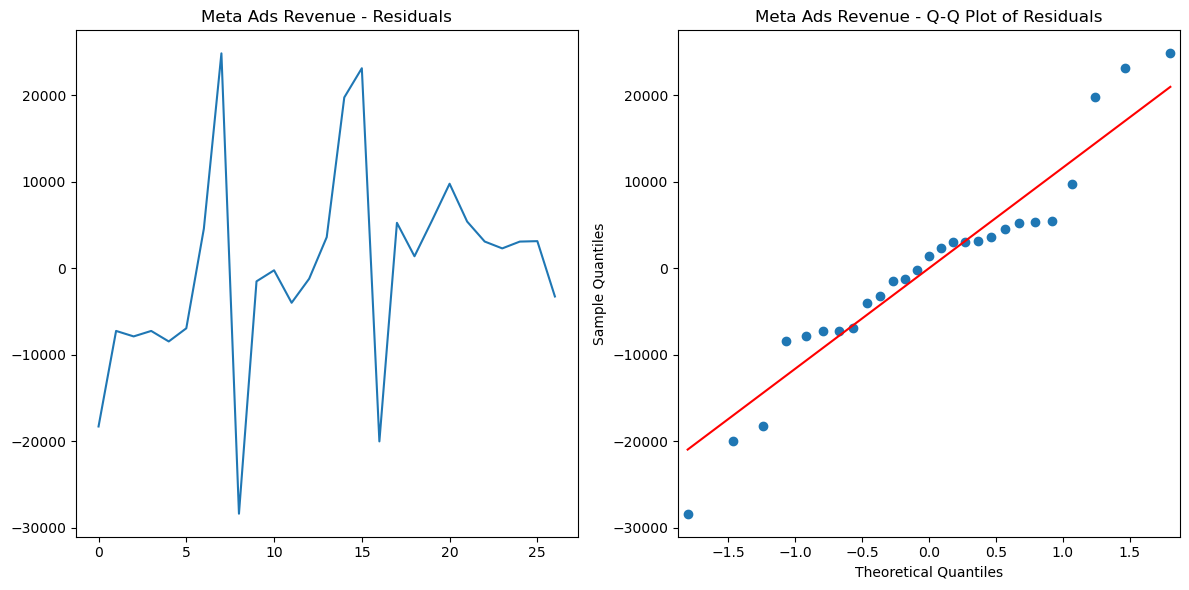

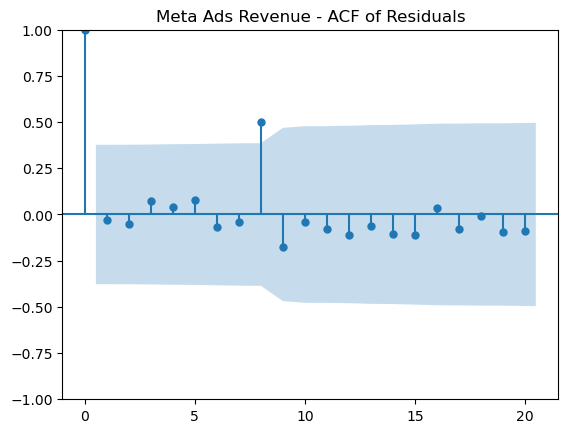

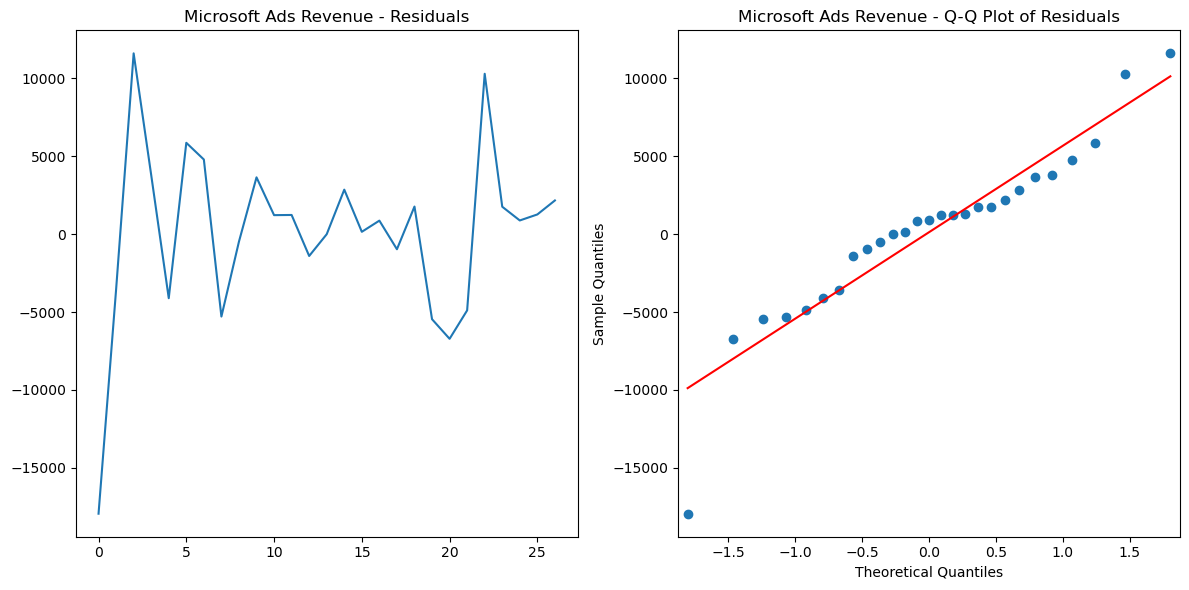

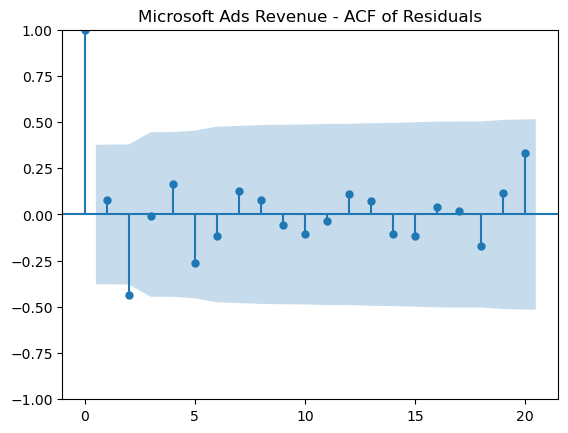

In [49]:
import statsmodels.api as sm

def plot_residuals(model_fit, title):
    residuals = model_fit.resid
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot residuals
    ax[0].plot(residuals)
    ax[0].set_title(f'{title} - Residuals')

    # Plot Q-Q plot to check for normality
    sm.qqplot(residuals, line='s', ax=ax[1])
    ax[1].set_title(f'{title} - Q-Q Plot of Residuals')

    plt.tight_layout()
    plt.show()

    # Plot ACF of residuals
    plot_acf(residuals, lags=20)
    plt.title(f'{title} - ACF of Residuals')
    plt.show()

# Plot residuals and diagnostics for Google Ads
plot_residuals(google_arima, 'Google Ads Revenue')

# Plot residuals and diagnostics for Meta Ads
plot_residuals(meta_arima, 'Meta Ads Revenue')

# Plot residuals and diagnostics for Microsoft Ads
plot_residuals(microsoft_arima, 'Microsoft Ads Revenue')


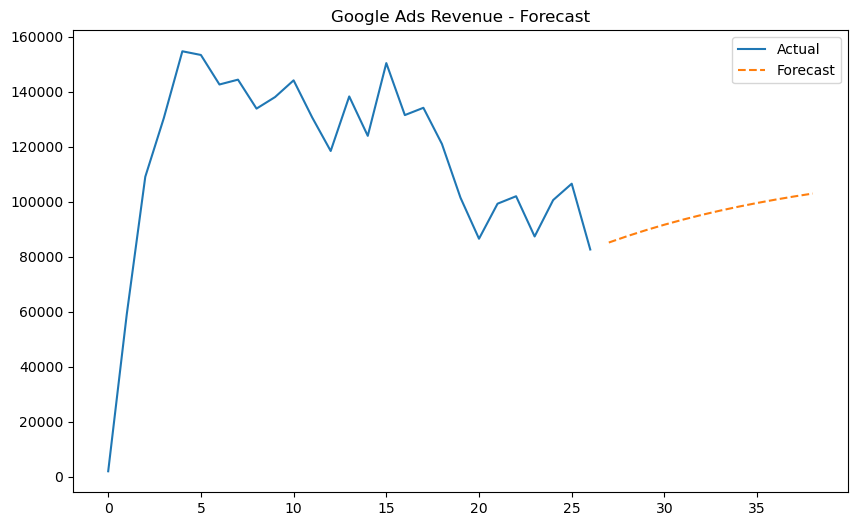

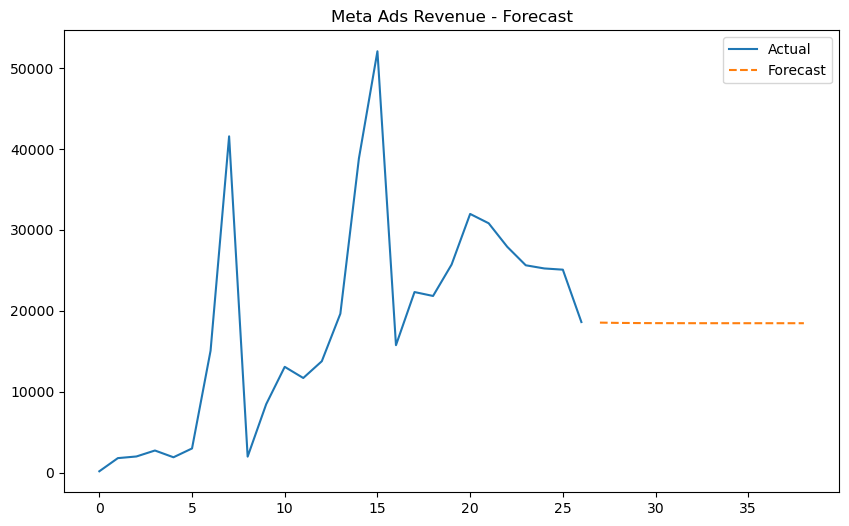

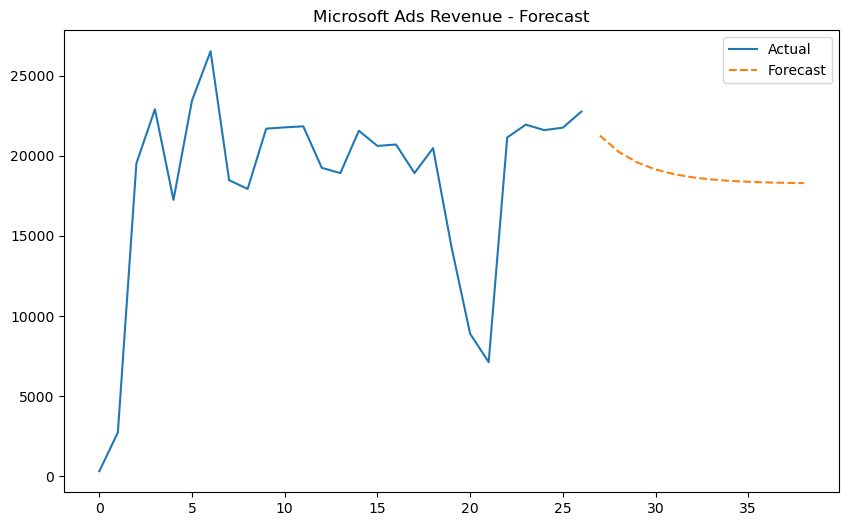

In [50]:
# Function to forecast and plot predictions
def forecast_arima(model_fit, data, title, periods=12):
    forecast = model_fit.forecast(steps=periods)
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data, label='Actual')
    plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
    plt.title(f'{title} - Forecast')
    plt.legend()
    plt.show()

# Forecast Google Ads Revenue
forecast_arima(google_arima, google_weekly['Revenue'], 'Google Ads Revenue')

# Forecast Meta Ads Revenue
forecast_arima(meta_arima, meta_weekly['Revenue'], 'Meta Ads Revenue')

# Forecast Microsoft Ads Revenue
forecast_arima(microsoft_arima, microsoft_weekly['Revenue'], 'Microsoft Ads Revenue')


In [51]:
!pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 75.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 90.1 MB/s eta 0:00:00


PROPHET

In [53]:
import pandas as pd
from prophet import Prophet

# Prepare the Google Ads Revenue data for Prophet
google_prophet_data = google_weekly.reset_index().rename(columns={'Date': 'ds', 'Revenue': 'y'})

# Prepare the Meta Ads Revenue data for Prophet
meta_prophet_data = meta_weekly.reset_index().rename(columns={'Date': 'ds', 'Revenue': 'y'})

# Prepare the Microsoft Ads Revenue data for Prophet
microsoft_prophet_data = microsoft_weekly.reset_index().rename(columns={'Date': 'ds', 'Revenue': 'y'})


In [54]:
# Initialize and fit the Prophet model for Google Ads Revenue
google_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
google_model.fit(google_prophet_data)

# Initialize and fit the Prophet model for Meta Ads Revenue
meta_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
meta_model.fit(meta_prophet_data)

# Initialize and fit the Prophet model for Microsoft Ads Revenue
microsoft_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
microsoft_model.fit(microsoft_prophet_data)


17:56:51 - cmdstanpy - INFO - Chain [1] start processing
17:56:51 - cmdstanpy - INFO - Chain [1] done processing
17:56:51 - cmdstanpy - INFO - Chain [1] start processing
17:56:51 - cmdstanpy - INFO - Chain [1] done processing
17:56:51 - cmdstanpy - INFO - Chain [1] start processing
17:56:51 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
# Define the forecast period (e.g., next 12 weeks)
future_periods = 12

# Create future dataframe for Google Ads Revenue forecast
google_future = google_model.make_future_dataframe(periods=future_periods, freq='W')
google_forecast = google_model.predict(google_future)

# Create future dataframe for Meta Ads Revenue forecast
meta_future = meta_model.make_future_dataframe(periods=future_periods, freq='W')
meta_forecast = meta_model.predict(meta_future)

# Create future dataframe for Microsoft Ads Revenue forecast
microsoft_future = microsoft_model.make_future_dataframe(periods=future_periods, freq='W')
microsoft_forecast = microsoft_model.predict(microsoft_future)


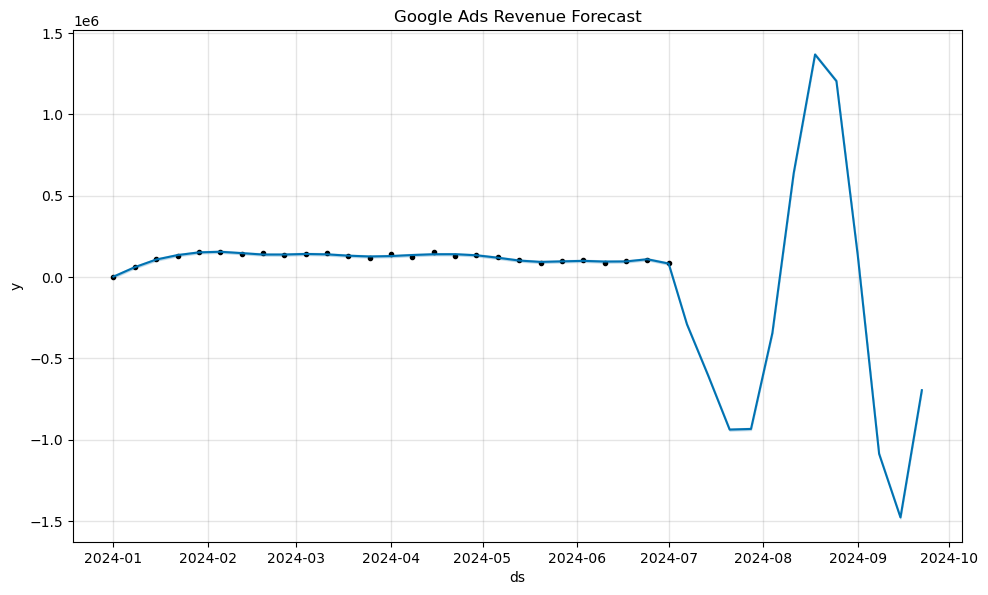

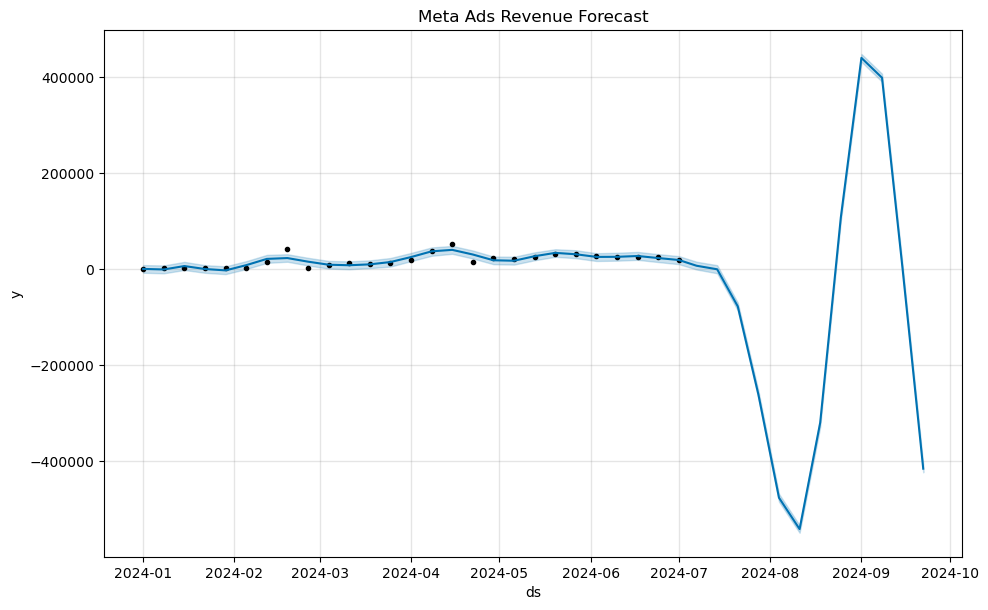

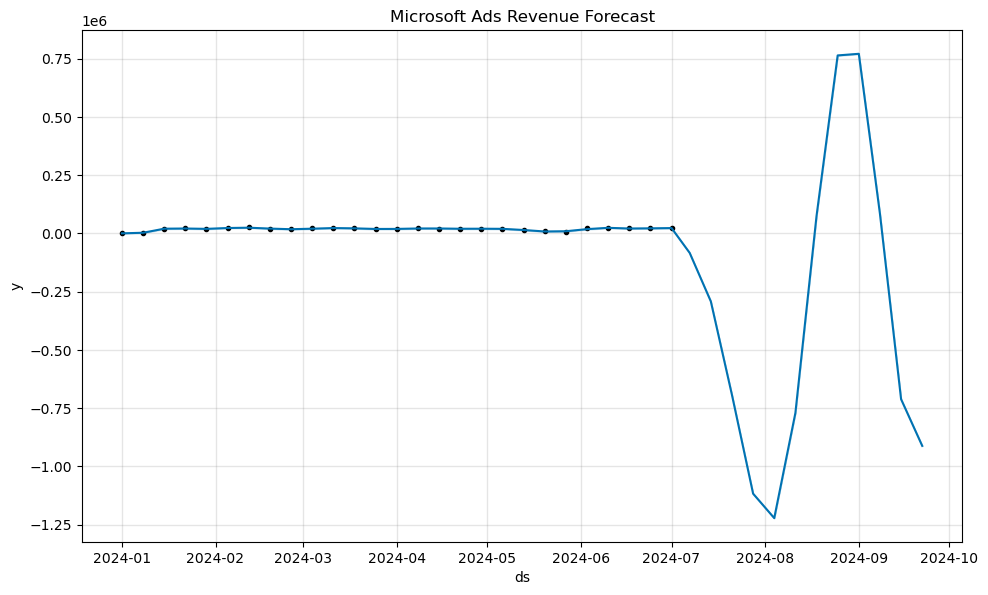

In [56]:
# Plot the forecast for Google Ads Revenue
google_model.plot(google_forecast)
plt.title('Google Ads Revenue Forecast')
plt.show()

# Plot the forecast for Meta Ads Revenue
meta_model.plot(meta_forecast)
plt.title('Meta Ads Revenue Forecast')
plt.show()

# Plot the forecast for Microsoft Ads Revenue
microsoft_model.plot(microsoft_forecast)
plt.title('Microsoft Ads Revenue Forecast')
plt.show()


In [58]:
from prophet.diagnostics import cross_validation, performance_metrics

# Adjust parameters based on the data size
initial_period = '90 days'  # Start with the first 90 days for initial training
period = '30 days'  # Period of evaluation
horizon = '60 days'  # Forecast horizon

# Cross-validation for Google Ads Revenue
google_cv = cross_validation(google_model, initial=initial_period, period=period, horizon=horizon)
google_performance = performance_metrics(google_cv)
print(google_performance)

# Cross-validation for Meta Ads Revenue
meta_cv = cross_validation(meta_model, initial=initial_period, period=period, horizon=horizon)
meta_performance = performance_metrics(meta_cv)
print(meta_performance)

# Cross-validation for Microsoft Ads Revenue
microsoft_cv = cross_validation(microsoft_model, initial=initial_period, period=period, horizon=horizon)
microsoft_performance = performance_metrics(microsoft_cv)
print(microsoft_performance)


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/2 [00:00<?, ?it/s]

17:58:20 - cmdstanpy - INFO - Chain [1] start processing
17:58:20 - cmdstanpy - INFO - Chain [1] done processing
17:58:20 - cmdstanpy - INFO - Chain [1] start processing
17:58:20 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


   horizon           mse          rmse           mae       mape      mdape  \
0   4 days  1.757341e+10  1.325647e+05  1.325647e+05   1.095179   1.095179   
1   6 days  9.121436e+09  9.550621e+04  9.550621e+04   0.770233   0.770233   
2  11 days  2.980598e+11  5.459485e+05  5.459485e+05   5.378156   5.378156   
3  13 days  1.247903e+10  1.117096e+05  1.117096e+05   0.742460   0.742460   
4  18 days  1.578470e+12  1.256372e+06  1.256372e+06  14.512534  14.512534   
5  20 days  8.984278e+09  9.478543e+04  9.478543e+04   0.720531   0.720531   
6  25 days  3.894190e+12  1.973370e+06  1.973370e+06  19.869191  19.869191   
7  27 days  5.337774e+11  7.306007e+05  7.306007e+05   5.444098   5.444098   
8  32 days  4.999059e+12  2.235858e+06  2.235858e+06  21.913663  21.913663   
9  34 days  2.278390e+12  1.509434e+06  1.509434e+06  12.470134  12.470134   
10 39 days  2.865409e+12  1.692752e+06  1.692752e+06  19.368227  19.368227   
11 41 days  3.292221e+12  1.814448e+06  1.814448e+06  17.874186 

  0%|          | 0/2 [00:00<?, ?it/s]

17:58:20 - cmdstanpy - INFO - Chain [1] start processing
17:58:20 - cmdstanpy - INFO - Chain [1] done processing
17:58:20 - cmdstanpy - INFO - Chain [1] start processing
17:58:20 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


   horizon           mse          rmse           mae       mape      mdape  \
0   4 days  4.676370e+10  2.162492e+05  2.162492e+05   9.906644   9.906644   
1   6 days  1.588064e+09  3.985052e+04  3.985052e+04   1.026570   1.026570   
2  11 days  4.811385e+11  6.936415e+05  6.936415e+05  26.976820  26.976820   
3  13 days  1.047558e+10  1.023503e+05  1.023503e+05   1.965410   1.965410   
4  18 days  1.380356e+12  1.174885e+06  1.174885e+06  36.750310  36.750310   
5  20 days  1.469842e+10  1.212371e+05  1.212371e+05   7.700329   7.700329   
6  25 days  1.488804e+12  1.220165e+06  1.220165e+06  39.596091  39.596091   
7  27 days  4.155051e+09  6.445969e+04  6.445969e+04   2.888846   2.888846   
8  32 days  3.840515e+11  6.197189e+05  6.197189e+05  22.203712  22.203712   
9  34 days  9.250052e+10  3.041390e+05  3.041390e+05  13.932986  13.932986   
10 39 days  7.275792e+10  2.697368e+05  2.697368e+05  10.527586  10.527586   
11 41 days  1.513682e+11  3.890606e+05  3.890606e+05  15.131185 

  0%|          | 0/2 [00:00<?, ?it/s]

17:58:20 - cmdstanpy - INFO - Chain [1] start processing
17:58:21 - cmdstanpy - INFO - Chain [1] done processing
17:58:21 - cmdstanpy - INFO - Chain [1] start processing
17:58:21 - cmdstanpy - INFO - Chain [1] done processing


   horizon           mse           rmse            mae       mape      mdape  \
0   4 days  1.159040e+09   34044.675449   34044.675449   1.662947   1.662947   
1   6 days  5.610604e+08   23686.714553   23686.714553   1.098881   1.098881   
2  11 days  1.419245e+10  119132.088399  119132.088399   8.344102   8.344102   
3  13 days  4.552094e+09   67469.210016   67469.210016   3.273758   3.273758   
4  18 days  5.252756e+10  229188.915124  229188.915124  25.784881  25.784881   
5  20 days  6.654068e+09   81572.468504   81572.468504   3.941365   3.941365   
6  25 days  6.498784e+10  254927.124863  254927.124863  35.791804  35.791804   
7  27 days  2.002600e+08   14151.325197   14151.325197   0.748051   0.748051   
8  32 days  1.338160e+10  115678.865126  115678.865126   5.473565   5.473565   
9  34 days  4.251600e+10  206194.071982  206194.071982  10.071758  10.071758   
10 39 days  2.488140e+10  157738.392103  157738.392103   7.190026   7.190026   
11 41 days  1.301204e+11  360722.046399 

#### Possible Ways to Move Ahead:

1. **Feature Engineering:** 
   - Continue to explore additional features that could impact ROI, such as user engagement metrics, seasonal effects, or interaction terms between different features.

2. **Model Interpretation:** 
   - Use SHAP (SHapley Additive exPlanations) values or other interpretability methods to understand what features are driving the model's predictions. This will help in making informed decisions about which features to focus on for budget allocation.

3. **Optimization Framework:** 
   - Consider using optimization techniques such as Linear Programming or Genetic Algorithms to determine the best allocation of the total budget across channels and platforms. The objective function could be maximizing predicted ROI or revenue while considering constraints like budget limits.

4. **Cross-Platform Strategy:** 
   - Based on the insights, devise a cross-platform strategy. For example, if video ads perform well on Google, you could test similar strategies on Meta or Microsoft platforms.

5. **A/B Testing:** 
   - Conduct A/B testing within the highest ROI channels to further optimize ad creatives and targeting.

6. **Scenario Analysis:** 
   - Perform scenario analysis by simulating different budget allocations and predicting the outcome using your models. This will help in understanding the potential impact of different investment strategies.


In [65]:
# Define channels and their minimum allocation
channels = {
    'Google Ads': 20000,    # 10% of total budget
    'Meta Ads': 20000,      # 10% of total budget
    'Microsoft Ads': 20000  # 10% of total budget
}

# Calculate remaining budget after minimum allocation
remaining_budget = 200000 - sum(channels.values())


In [66]:
# Example ROI values from your analysis
roi = {
    'Google Ads': 250,    # ROI for the highest-performing campaign type
    'Meta Ads': 275,      # ROI for the highest-performing campaign type
    'Microsoft Ads': 143  # ROI for the highest-performing campaign type
}

# Calculate the total ROI
total_roi = sum(roi.values())

# Distribute remaining budget based on ROI
for channel in channels:
    channels[channel] += (roi[channel] / total_roi) * remaining_budget


In [64]:
# Check total budget allocation
total_allocated = sum(sum(campaign_budget.values()) for campaign_budget in channel_campaign_budget.values())
print(f"Total Allocated Budget: ${total_allocated:.2f}")

# Adjust the budget if there's a discrepancy
budget_difference = 200000 - total_allocated

if budget_difference != 0:
    # Find the channel and campaign with the largest budget allocation
    max_campaign = None
    max_budget = 0
    
    for channel, campaigns in channel_campaign_budget.items():
        for campaign, budget in campaigns.items():
            if budget > max_budget:
                max_budget = budget
                max_campaign = (channel, campaign)
    
    # Adjust the budget of the campaign with the largest allocation
    channel, campaign = max_campaign
    channel_campaign_budget[channel][campaign] += budget_difference
    
    print(f"Adjusted {campaign} in {channel} by ${budget_difference:.2f}")

# Final budget check
total_allocated = sum(sum(campaign_budget.values()) for campaign_budget in channel_campaign_budget.values())
print(f"Final Total Allocated Budget: ${total_allocated:.2f}")


Total Allocated Budget: $60000.00
Adjusted Video in Google Ads by $140000.00
Final Total Allocated Budget: $200000.00
